# <a id="2"></a>
<h1 style="background-color:#2eddc6;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">CHD Notebook </h1>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Data Overview</h3>

The **Framingham Heart Study** is considering a turning point in identifying the **risk factors of heart disease**, and is one of the most important epidemiological studies conducted.

A lot of our present understanding of cardiovascular disease can be attributed to this study.

To better understand heart disease and the measures that could be taken to combat it, the Framingham Heart Study (FHS) was established in the late 1940's.

It was a **joint project of Boston University and the National Heart, Lung, and Blood Institute (NHLBI)**.

The **aim** of the study was to to **better understand cardiovascular disease by enrolling people free of the disease, and see who** 

**developed the disease in the next 10 years.**

|         Column       |                             Description                            |
|:-------------------:|:---------------------------------------------------------------:|
|         Gender        |                Male or female (Nominal)                            |
|         Age         |                Age of the patient (Continuous)                      |
|   Current Smoker    |     Whether or not the patient is a current smoker (Nominal)      |
|    Cigs Per Day     |     The number of cigarettes that the person smoked on average in one day (Continuous) |
|      BP Meds        |     Whether or not the patient was on blood pressure medication (Nominal) |
|  Prevalent Stroke   |     Whether or not the patient had previously had a stroke (Nominal) |
|   Prevalent Hyp     |     Whether or not the patient was hypertensive (Nominal)          |
|      Diabetes       |     Whether or not the patient had diabetes (Nominal)               |
|      Tot Chol       |     Total cholesterol level (Continuous)                            |
|       Sys BP        |     Systolic blood pressure (Continuous)                            |
|       Dia BP        |     Diastolic blood pressure (Continuous)                           |
|         BMI         |     Body Mass Index (Continuous)                                    |
|     Heart Rate      |     Heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of the large number of possible values) |
|       Glucose       |     Glucose level (Continuous)                                      |
|10-year risk of coronary heart disease CHD| Binary variable indicating whether the patient has a 10-year risk of coronary heart disease (CHD) (Binary: "1" means "Yes", "0" means "No") |

# <a id="2"></a>
<h1 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Medical Background </h1>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Cardiovascular systemt</h3>

The cardiovascular system, also known as the circulatory system, is a vital network of organs, vessels, and tissues responsible for transporting blood, oxygen, nutrients, and waste products throughout the body. It plays a crucial role in maintaining homeostasis and supporting various bodily functions. The key components of the cardiovascular system include the heart, blood vessels, and blood.

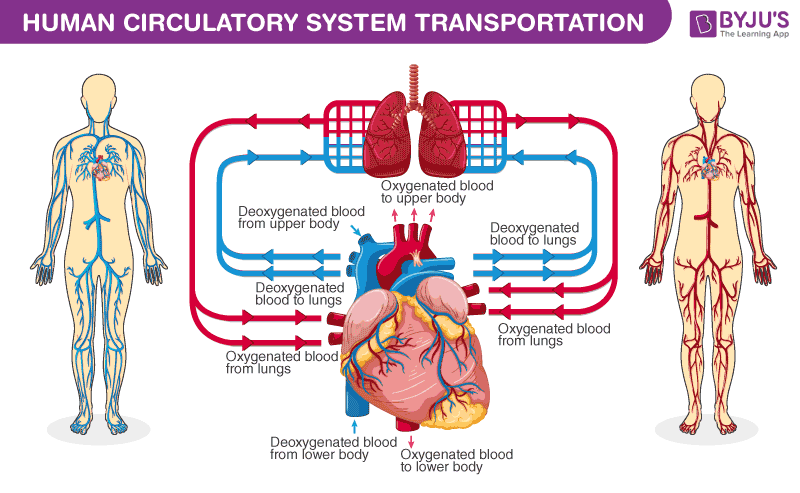

In [694]:
from IPython.display import Image
Image(filename='Human-Circulatory-System-Transportation.png',width=900,height=400)

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Coronary Artery Disease(CAD)</h3>

Coronary artery disease (CAD), also known as ischemic heart disease (IHD), is a condition characterized by impaired blood flow to the heart muscle. This is most often caused by atherosclerosis, a process in which plaques, made up of fat, cholesterol, calcium, and other substances found in the blood, build up on the inner walls of the coronary arteries. These arteries are the major blood vessels that supply the heart with oxygen, nutrients, and blood.

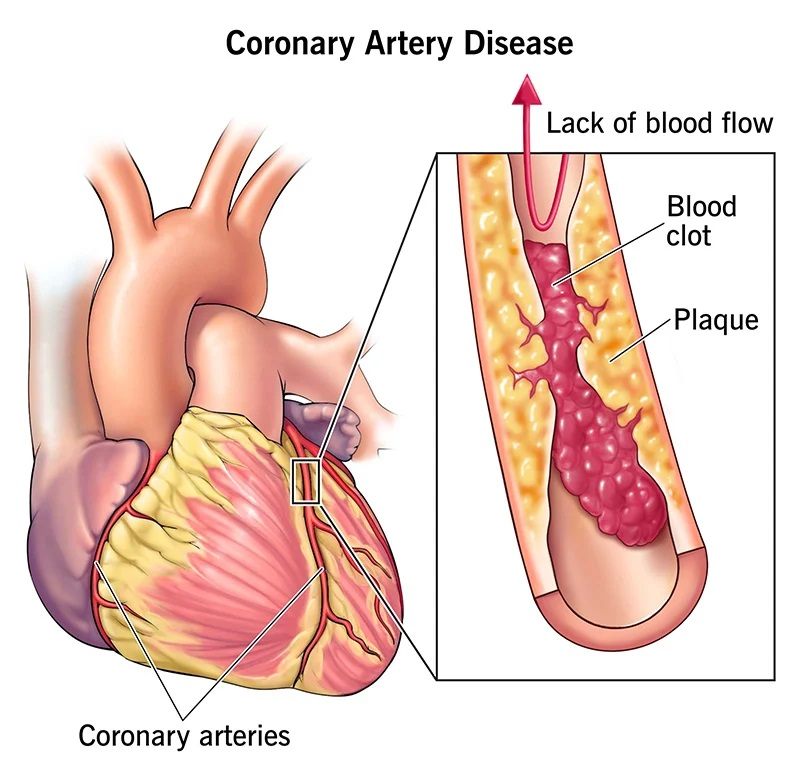

In [698]:
Image(filename='CAD.jpg',width=900,height=400)

# <a id="2"></a>
<h1 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;"> Libraries & loading the data</h1>

In [509]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [510]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [511]:
df = pd.read_csv('CHD.csv')

# <a id="2"></a>
<h1 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;"> Exploratory Data Analysis</h1>


In [512]:
print(f'No. of records are {df.shape[0]}')
print(f'No. of columns are {df.shape[1]}')

No. of records are 4238
No. of columns are 16


In [513]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [514]:
column = list(df.columns)
categorical_features = []
discrete_features = []

for i in column:
    if len(df[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Continous Features :',*discrete_features)

Categorical Features : male education currentSmoker BPMeds prevalentStroke prevalentHyp diabetes TenYearCHD
Continous Features : age cigsPerDay totChol sysBP diaBP BMI heartRate glucose


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [516]:
round(df.describe())

male     age  education  currentSmoker  cigsPerDay  BPMeds  \
count  4238.0  4238.0     4133.0         4238.0      4209.0  4185.0   
mean      0.0    50.0        2.0            0.0         9.0     0.0   
std       0.0     9.0        1.0            1.0        12.0     0.0   
min       0.0    32.0        1.0            0.0         0.0     0.0   
25%       0.0    42.0        1.0            0.0         0.0     0.0   
50%       0.0    49.0        2.0            0.0         0.0     0.0   
75%       1.0    56.0        3.0            1.0        20.0     0.0   
max       1.0    70.0        4.0            1.0        70.0     1.0   

       prevalentStroke  prevalentHyp  diabetes  totChol   sysBP   diaBP  \
count           4238.0        4238.0    4238.0   4188.0  4238.0  4238.0   
mean               0.0           0.0       0.0    237.0   132.0    83.0   
std                0.0           0.0       0.0     45.0    22.0    12.0   
min                0.0           0.0       0.0    107.0    84.0    48.0   
25%                0.0           0.0       0.0    206.0   117.0    75.0   
50%                0.0           0.0       0.0    234.0   128.0    82.0   
75%                0.0           1.0       0.0    263.0   144.0    90.0   
max                1.0           1.0       1.0    696.0   295.0   142.0   

          BMI  heartRate  glucose  TenYearCHD  
count  4219.0     4237.0   3850.0      4238.0  
mean     26.0       76.0     82.0         0.0  
std       4.0       12.0     24.0         0.0  
min      16.0       44.0     40.0         0.0  
25%      23.0       68.0     71.0         0.0  
50%      25.0       75.0     78.0         0.0  
75%      28.0       83.0     87.0         0.0  
max      57.0      143.0    394.0         1.0

In [517]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [518]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [519]:
df['gender'] = df['male'].map({1 : 'male', 0 : 'female'})
df = df.drop('male', axis=1)

In [520]:
df['education'] = df['education'].map({1 : 'High School', 2 : 'High School Diploma/GED' ,
                                       3 :'College'     , 4 : 'Higher Degree'})

In [521]:
df['tenYearCHD'] = df['TenYearCHD'].map({1 : 1, 0 : 0})
df = df.drop('TenYearCHD', axis=1)

In [522]:
df.head()

age                education  currentSmoker  cigsPerDay  BPMeds  \
0   39            Higher Degree              0         0.0     0.0   
1   46  High School Diploma/GED              0         0.0     0.0   
2   48              High School              1        20.0     0.0   
3   61                  College              1        30.0     0.0   
4   46                  College              1        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    195.0  106.0   70.0  26.97   
1                0             0         0    250.0  121.0   81.0  28.73   
2                0             0         0    245.0  127.5   80.0  25.34   
3                0             1         0    225.0  150.0   95.0  28.58   
4                0             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose  gender  tenYearCHD  
0       80.0     77.0    male           0  
1       95.0     76.0  female           0  
2       75.0     70.0    male           0  
3       65.0    103.0  female           1  
4       85.0     85.0  female           0

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Target distribution</h3>

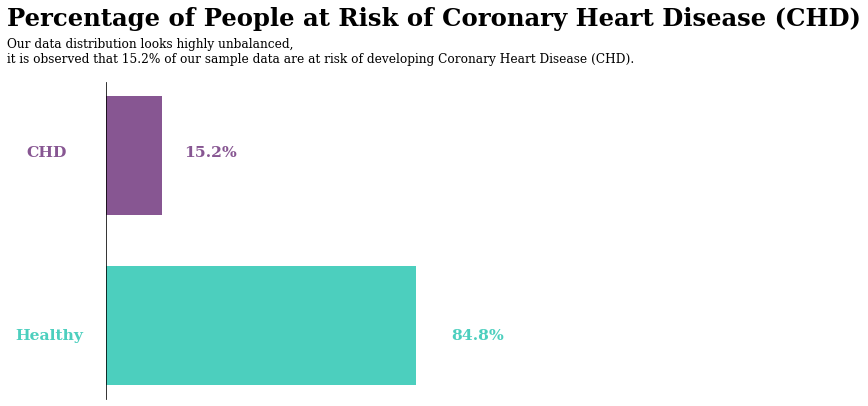

In [523]:
# let us overview the distribution of the target of our data
x = pd.DataFrame(df.groupby(['tenYearCHD'])['tenYearCHD'].count())

# Plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=70)
ax.barh([1], x.tenYearCHD[1], height=0.7, color='#875692')
plt.text(-1050, -0.08, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#4ccfbe'})
plt.text(4000, -0.08, '84.8%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#4ccfbe'})
ax.barh([0], x.tenYearCHD[0], height=0.7, color='#4ccfbe')
plt.text(-930, 1, 'CHD', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#875692'})
plt.text(900, 1, '15.2%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#875692'})

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.text(-1150, 1.77, 'Percentage of People at Risk of Coronary Heart Disease (CHD)', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
plt.text(-1150, 1.55, 'Our data distribution looks highly unbalanced,\nit is observed that 15.2% of our sample data are at risk of developing Coronary Heart Disease (CHD).',
         {'font': 'Serif', 'size': '12.5', 'color': 'black'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

From distribution it is clear that **only every 15 people out of 100 people have develpoed CHD from our sampling data**. So this this appears as a highly **unbalanced data distribution**, and null accuracy score of this distribution it self is 85%, whcih imploys any dump model should randomly predictions of CHD could reach accuracy of 85%. So, while modeling and training data, **over sampling and under sampling** have to be done to obtain good and reliable results.

# <a id="2"></a>
<h1 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;"> Dealing with null values</h1>

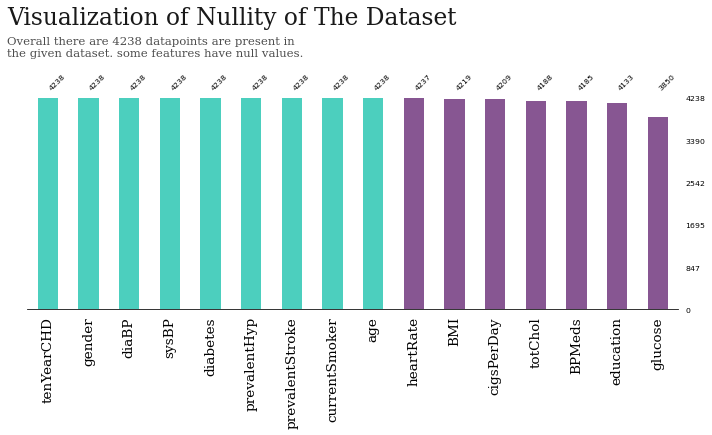

In [524]:
import missingno as msno

color = ['#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#4ccfbe','#875692','#875692','#875692', '#875692', '#875692', '#875692', '#875692' , '#875692']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off', filter = 'top')

ax.text(-1,1.35,'Visualization of Nullity of The Dataset',{'font': 'serif', 'size': 24,  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'Overall there are 4238 datapoints are present in \nthe given dataset. some features have null values.',{'font': 'serif', 'size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'serif', 'size': 14,'weight':'normal','color':'black'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.show()

**How can we deal with blanks in our data?**

There are many ways. One can simply drop these records, fill the blanks with the mean, the median, or even simply the record before or after the missing value.


# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Education</h3>

In [525]:
df['education'].mode()[0]

'High School'

In [526]:
df.loc[df.education.isnull(),'education'] = df['education'].mode()[0]

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">CigsPerDay</h3>

In [527]:
df['cigsPerDay'].median()

0.0

In [528]:
df.loc[df.cigsPerDay.isnull(), 'cigsPerDay'] = df['cigsPerDay'].median()

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">BPMeds</h3>

In [529]:
df['BPMeds'].mode()[0]

0.0

In [530]:
df.loc[df.BPMeds.isnull() ,'BPMeds'] = df['BPMeds'].mode()[0]

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">TotChol</h3>

In [531]:
df['totChol'].median()

234.0

In [532]:
df.loc[df.totChol.isnull(), 'totChol'] = df['totChol'].median()

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">BMI</h3>

In [533]:
df['BMI'].median()

25.4

In [534]:
df.loc[df.BMI.isnull(),'BMI'] = df.BMI.median()

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">HeartRate</h3>

In [535]:
df['heartRate'].median()

75.0

In [536]:
df.loc[df.heartRate.isnull(),'heartRate'] = df.heartRate.median()

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Glucose</h3>

In [537]:
df = df.dropna(subset=['glucose'])

 **All null values have been filled** 

In [538]:
df.isnull().sum()

age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
gender             0
tenYearCHD         0
dtype: int64

In [539]:
df.to_csv("updated_CHD.csv")

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Visualization Functions</h3>

There are many different types of graphs, each with its own unique properties and applications. 

We will use :

   1- **Pie plot** : for **Categorical data**
   
   2- **KDE plot** (kernel density estimation plot) : for **Numerical data**
   
   3- **Box Plot** : for **definition of outliers in numerical data**
   
   4- **Histogram** : for **distribution of numerical data**

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Catigorical data</h3>

In [540]:
def pie_plot(df, group_feature, overall_title, colors):
    # Calculate percentage of each category in the group feature
    grouped = df[group_feature].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(figsize=(8, 6))

        wedges, texts, autotexts = ax.pie(grouped['percentage'], labels=grouped['index'],
                                           autopct='%1.1f%%', colors=colors)
        ax.set_title(f'Distribution of {overall_title}')  # Set the title to be the group feature
        plt.setp(autotexts, size=16, color="w")

        plt.tight_layout()
        plt.show()

In [541]:
def pie_with_target(df, group_feature, overall_title):
    # Calculate percentage of people who developed CHD for each group
    grouped = df.groupby(group_feature)['tenYearCHD'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    # Define custom color palette
    custom_palette = {0: '#4ccfbe', 1: '#875692'}
    # Define custom legend labels
    legend_labels = {0: 'Healthy', 1: 'CHD'}

    unique_groups = grouped[group_feature].unique()
    num_unique_groups = len(unique_groups)

    # Ensure all CHD statuses are in custom_palette and legend_labels
    assert set(grouped['tenYearCHD'].unique()).issubset(custom_palette.keys()), "All CHD statuses must be keys in custom_palette"
    assert set(grouped['tenYearCHD'].unique()).issubset(legend_labels.keys()), "All CHD statuses must be keys in legend_labels"

    with plt.style.context('fivethirtyeight'):
        fig, axs = plt.subplots(1, num_unique_groups, figsize=(15, 6))

        if num_unique_groups == 1:
            axs = [axs]  # To handle the case where there is only 1 group

        for i, group_status in enumerate(unique_groups):
            data = grouped[grouped[group_feature]== group_status ]
            labels = data['tenYearCHD'].map(legend_labels).tolist() # map stroke status to labels
            colors = data['tenYearCHD'].map(custom_palette).tolist() # map stroke status to colors
            wedges, texts, autotexts = axs[i].pie(data['percentage'], labels=labels, colors=colors, autopct='%1.1f%%')

            axs[i].set_title(f'{group_status}')  # Set the title to be the group feature and status
            plt.setp(autotexts, size=16, color="w")
        
        
        fig.suptitle(f'Percentage of people who developed CHD grouped by {overall_title} status', fontsize=18)
        plt.tight_layout()
        plt.show()

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Continuous data</h3>

In [542]:
def plot_distribution(df, feature, plot_title):
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

        # Histogram
        sns.histplot(x=feature,
                     data=df, 
                     ax=ax[0],
                     linewidth=0.8,
                     color='#4ccfbe',
                     bins=20).set_title(f"Distribution of {plot_title}")
        ax[0].set_xlabel(plot_title)

        # Box plot for the entire distribution
        sns.boxplot(x=feature,
                    data=df,
                    linewidth=1.5,
                    width=0.5,
                    color='#4ccfbe',
                    ax=ax[1]).set_title(f"Box Plot of {plot_title}")
        ax[1].set_xlabel(plot_title)

        plt.show()

In [543]:
df['TenYearCHD_statue'] = df['tenYearCHD'].map({1: 'CHD', 0: 'Healthy'})
def plot_CHD_vs_Healthy(feature, plot_title, df = df):
    box_plots_colors = {'Healthy': '#4ccfbe', 'CHD':'#875692'}
    
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

        # KDE plot for CHD vs Healthy
        sns.kdeplot(data=df[df['TenYearCHD_statue']=='CHD'], x=feature, color='#875692', fill=True, linewidth=1.5, ec='black', alpha=0.8, zorder=3, ax=ax[0])
        sns.kdeplot(data=df[df['TenYearCHD_statue']=='Healthy'], x=feature, color='#4ccfbe', fill=True, linewidth=1.5, ec='black', alpha=0.8, zorder=3, ax=ax[0])

        ax[0].set_title(f"KDE Plot of {plot_title} by CHD")
        ax[0].set_xlabel(plot_title)
        ax[0].set_ylabel('Density')

        # Box plot for CHD vs Healthy
        sns.boxplot(x=feature,
                    data=df,
                    y="TenYearCHD_statue",
                    linewidth=1.5,
                    palette=box_plots_colors,
                    ax=ax[1]).set_title(f"Distribution of {plot_title} by CHD")
        ax[1].set_xlabel(plot_title)
        ax[1].set_ylabel('10 years CHD Status')

        plt.show()

# <a id="2.2"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Feature Statistics Functions</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Catigorical data</h3>

In [544]:
def explore_categorical_variable(feature, data = df):
    # Extract the column from the dataset
    column = data[feature]
    
    # Data type
    data_type = column.dtype
    
    # Count of each category
    count = column.count()
    
    # Mode (most frequent category)
    mode = column.mode().iloc[0]
    
    unique_values = column.nunique()
    
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Statistics': ['Data Type', 'Count', 'Mode', 'Num of Possible values'],
        'Values': [data_type, count,  mode , unique_values ]
    })
    
    # Remove the index column
    results_df = results_df.reset_index(drop=True)
    
    return results_df

In [545]:
def explore_categories(feature_name, category_names, data=df):
    
    # Extract the column from the dataset
    column = data[feature_name]

    # Data type
    data_type = str(column.dtype)

    # Count of each category
    category_counts = column.value_counts()

    # Percentage of each category
    category_percentages = {category: count / column.count() * 100 for category, count in category_counts.items()}

    # Create a DataFrame for count, percentage, data type, and mode
    result_df = pd.DataFrame({
        f'{feature_name}': category_counts.index,
        'Count': category_counts.values,
        'Percentage': [category_percentages.get(category, 0) for category in category_counts.index],
    })

    # Formatting for Percentage column
    result_df['Percentage'] = result_df['Percentage'].round(2)

    return result_df

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Continuous data</h3>

In [546]:
def explore_continuous_variable(feature, data=df):
    # Extract the column from the dataset
    column = data[feature]
    
    # Data type
    data_type = column.dtype
    
    # Basic statistics
    minimum = int(column.min())
    maximum = int(column.max())
    data_range = maximum - minimum
    mean = round(column.mean())
    median = int(column.median())
    q3 = int(column.quantile(0.75))
    q1 = int(column.quantile(0.25))
    iqr = q3 - q1
    variance = round(column.var(), 2)
    std_deviation = round(column.std(), 2)
    coefficient_of_variation = round(np.sqrt(variance) / mean, 2)
    skewness = round(column.skew(), 2)
    
    # Percentiles
    percentiles = column.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
    
    # Number of null values
    num_null_values = column.isnull().sum()
    
    # Calculate outliers based on IQR
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = round(((column < lower_bound) | (column > upper_bound)).mean() * 100, 2)
    
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Statistics': ['Feature', 'Data Type', 'Minimum Value', 'Maximum Value', 'Range', 'Mean', 'Median', 'Q3', 'Q1',
                       'IQR', 'Outliers Percentage', 'Variance', 'Standard Deviation', 'Coefficient of Variation', 'Skewness',
                       '10th Percentile', '25th Percentile', '50th Percentile', '75th Percentile', '90th Percentile',
                       'Number of Null Values','Lower Band' , 'Upper Band'],
        'Values': [feature, data_type, minimum, maximum, data_range, mean, median, q3, q1, iqr, outliers_percentage, variance, std_deviation,
                   coefficient_of_variation, skewness, int(percentiles['10%']), int(percentiles['25%']),
                   int(percentiles['50%']), int(percentiles['75%']), int(percentiles['90%']), num_null_values , lower_bound , upper_bound  
                   ]
    })
    
    results_df = results_df.reset_index(drop=True)
    
    # Create a Styler object
    styled_df = results_df.style.set_properties(**{'text-align': 'center'})
    
    return styled_df

In [547]:
def compare_feature_statistics(feature, data=df):
    # Extract the column for CHD and Healthy individuals
    CHD_column = data[data['tenYearCHD'] == 1][feature]
    healthy_column = data[data['tenYearCHD'] == 0][feature]

    # Basic statistics for CHD
    CHD_mean = int(CHD_column.mean())
    CHD_median = int(CHD_column.median())
    CHD_std_deviation = round(CHD_column.std(), 2)
    CHD_min = int(CHD_column.min())
    CHD_max = int(CHD_column.max())
    CHD_iqr = int(CHD_column.quantile(0.75) - CHD_column.quantile(0.25))

    # Basic statistics for Healthy
    healthy_mean = int(healthy_column.mean())
    healthy_median = int(healthy_column.median())
    healthy_std_deviation = round(healthy_column.std(), 2)
    healthy_min = int(healthy_column.min())
    healthy_max = int(healthy_column.max())
    healthy_iqr = int(healthy_column.quantile(0.75) - healthy_column.quantile(0.25))

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Statistics': ['Mean', 'Median', 'Std Deviation', 'Min', 'Max', 'IQR'],
        'CHD': [CHD_mean, CHD_median, CHD_std_deviation, CHD_min, CHD_max, CHD_iqr],
        'Healthy': [healthy_mean, healthy_median, healthy_std_deviation, healthy_min, healthy_max, healthy_iqr]
    })

    results_df = results_df.set_index('Statistics')
    
    results_df = results_df.astype(int)

    # Create a Styler object
    styled_df = results_df.style.set_properties(**{'text-align': 'center'})

    return styled_df

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Features</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Gender</h3>

**Male or Female**

In [548]:
explore_categorical_variable('gender')

Statistics  Values
0               Data Type  object
1                   Count    3850
2                    Mode  female
3  Num of Possible values       2

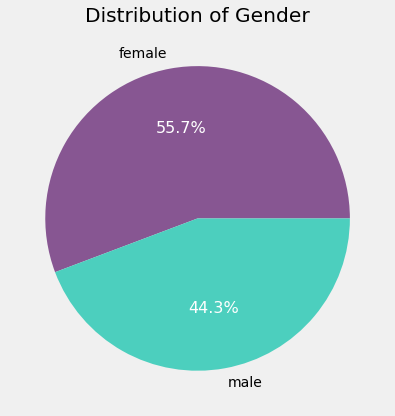

In [549]:
pie_plot(df, 'gender', 'Gender', colors=['#875692','#4ccfbe'])

In [550]:
explore_categories('gender',['male','female'])

gender  Count  Percentage
0  female   2146       55.74
1    male   1704       44.26

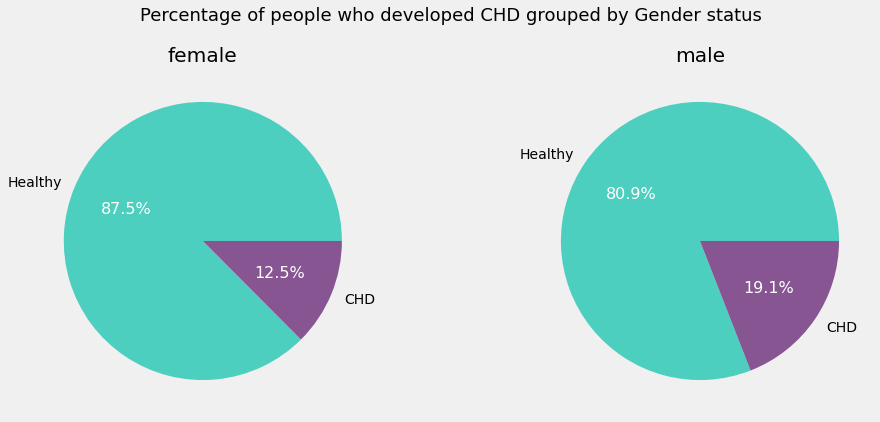

In [551]:
pie_with_target(df, 'gender', 'Gender')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Age</h3>

**Age of the patient**

In [552]:
explore_continuous_variable('age')

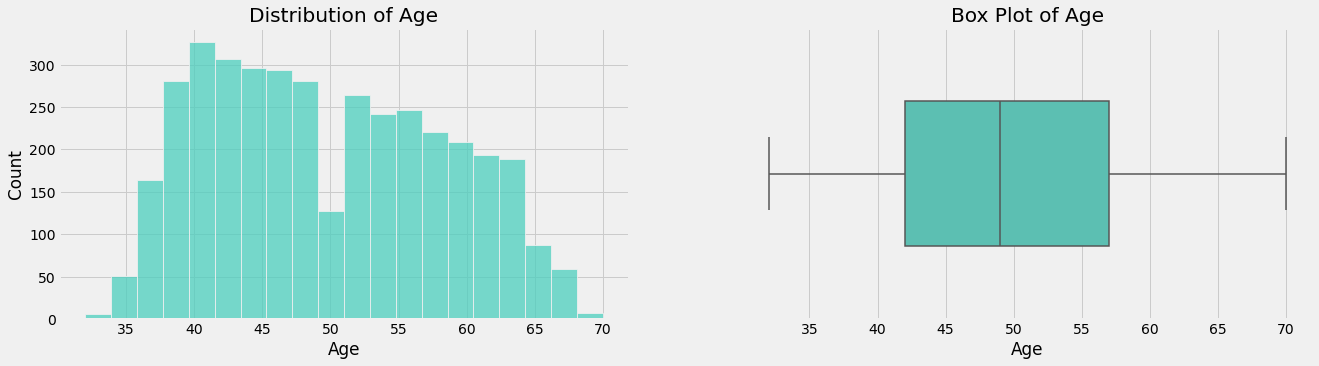

In [553]:
plot_distribution(df, 'age', 'Age')

In [554]:
compare_feature_statistics('age')

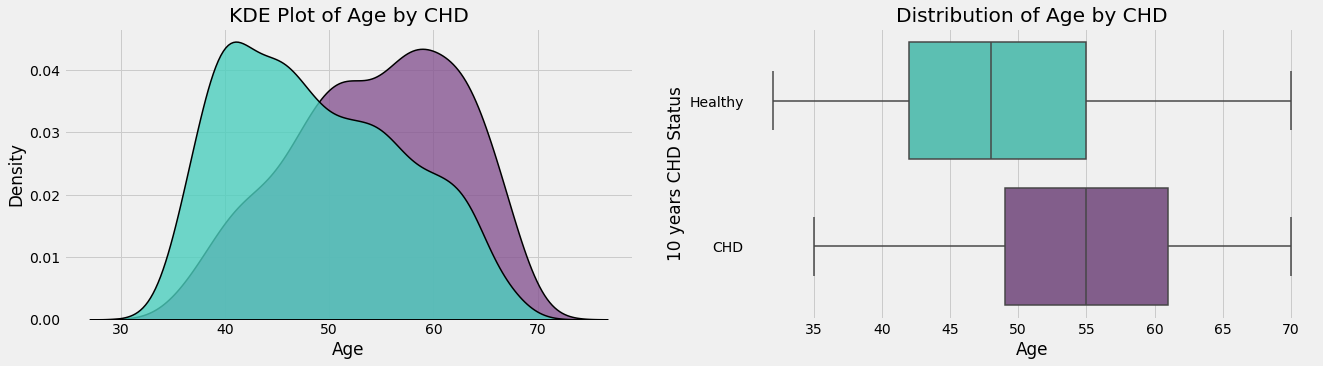

In [555]:
plot_CHD_vs_Healthy("age", "Age")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Education</h3>

**Education level of the patient**

In [556]:
explore_categorical_variable('education')

Statistics       Values
0               Data Type       object
1                   Count         3850
2                    Mode  High School
3  Num of Possible values            4

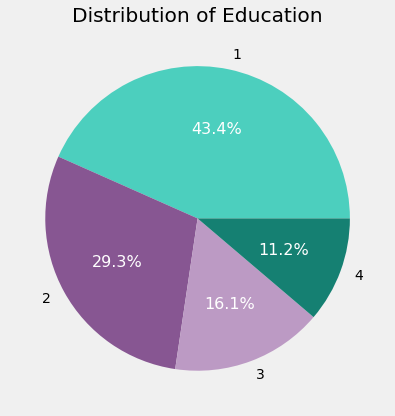

In [697]:
pie_plot(df, 'education', 'Education', colors=['#4ccfbe','#875692','#bc9ac4','#158072'])

In [558]:
explore_categories('education',['High School' , 'High School Diplome/GED' , 'College' , 'Higher Degree'])

education  Count  Percentage
0              High School   1669       43.35
1  High School Diploma/GED   1128       29.30
2                  College    621       16.13
3            Higher Degree    432       11.22

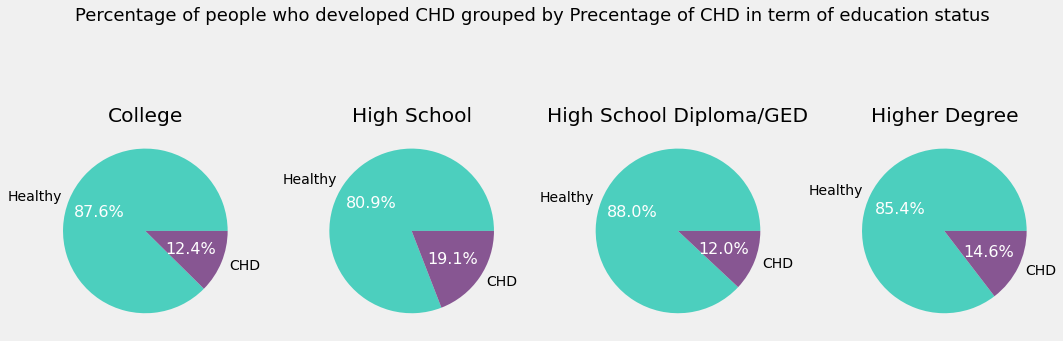

In [559]:
pie_with_target(df,"education","Precentage of CHD in term of education")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">CurrentSmoker</h3>

**Whether or not the patient is a current smoker**

In [560]:
explore_categorical_variable('currentSmoker')

Statistics Values
0               Data Type  int64
1                   Count   3850
2                    Mode      0
3  Num of Possible values      2

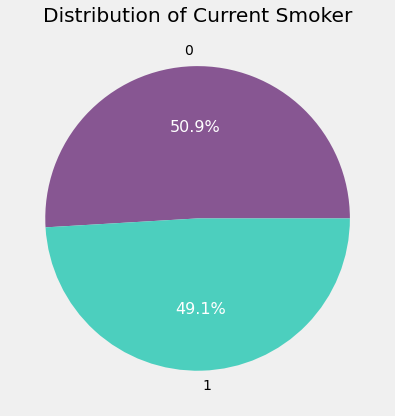

In [561]:
pie_plot(df, 'currentSmoker', 'Current Smoker', colors=['#875692','#4ccfbe'])

In [562]:
explore_categories('currentSmoker',[0,1])

currentSmoker  Count  Percentage
0              0   1961       50.94
1              1   1889       49.06

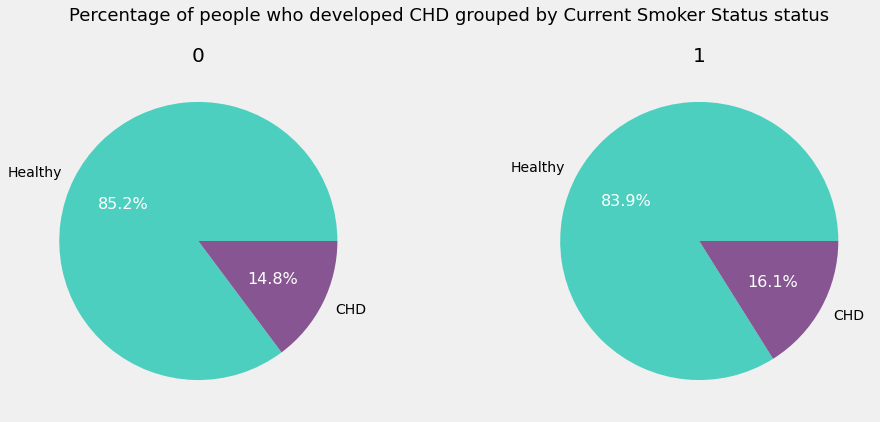

In [563]:
pie_with_target(df, 'currentSmoker', 'Current Smoker Status')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">CigsPerDay</h3>

**The number of cigarettes that the person smoked on average in one day**

In [564]:
explore_continuous_variable('cigsPerDay')

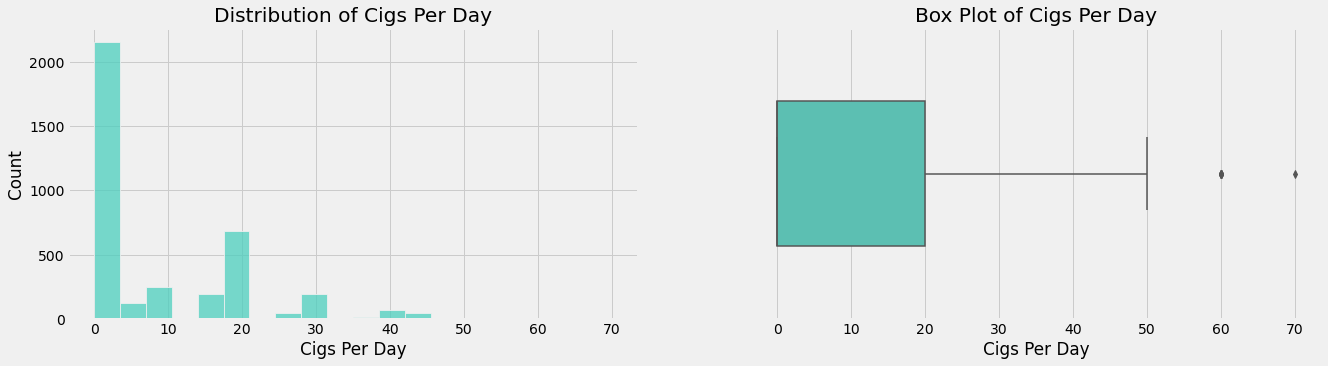

In [565]:
plot_distribution(df, 'cigsPerDay', 'Cigs Per Day')

In [566]:
compare_feature_statistics('cigsPerDay')

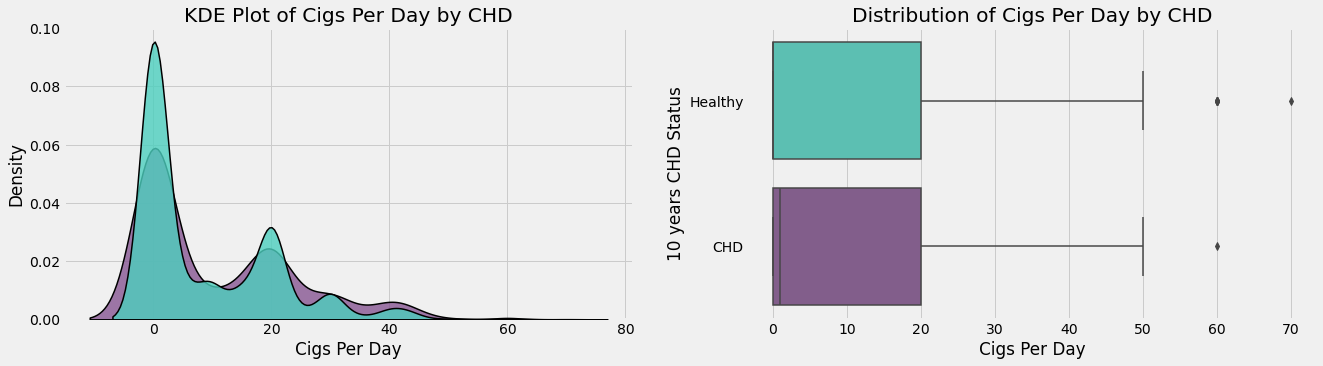

In [567]:
plot_CHD_vs_Healthy("cigsPerDay", "Cigs Per Day")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">BPMeds</h3>

**Whether or not the patient was on blood pressure medication**

In [568]:
explore_categorical_variable('BPMeds')

Statistics   Values
0               Data Type  float64
1                   Count     3850
2                    Mode      0.0
3  Num of Possible values        2

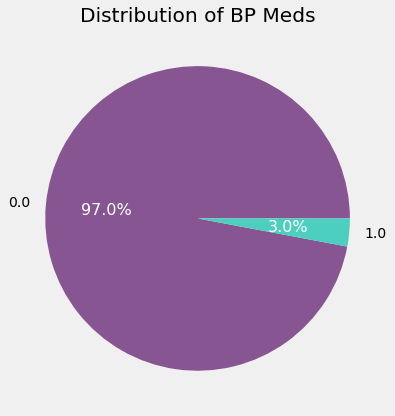

In [569]:
pie_plot(df, 'BPMeds', 'BP Meds', colors=['#875692','#4ccfbe'])

In [570]:
explore_categories('BPMeds',[0,1])

BPMeds  Count  Percentage
0     0.0   3736       97.04
1     1.0    114        2.96

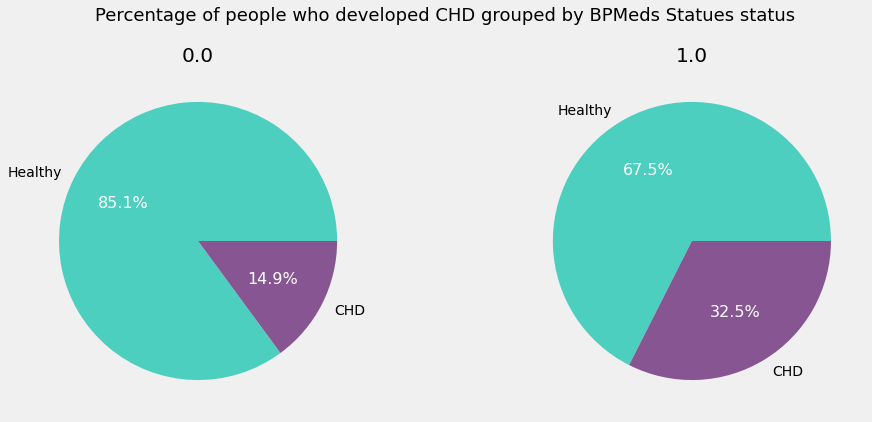

In [571]:
pie_with_target(df, 'BPMeds', 'BPMeds Statues')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">PrevalentStroke</h3>

**Whether or not the patient had previously had a stroke**

In [572]:
explore_categorical_variable('prevalentStroke')

Statistics Values
0               Data Type  int64
1                   Count   3850
2                    Mode      0
3  Num of Possible values      2

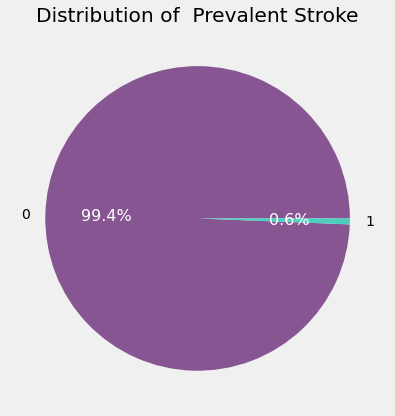

In [573]:
pie_plot(df, 'prevalentStroke', ' Prevalent Stroke', colors=['#875692','#4ccfbe'])

In [574]:
explore_categories('prevalentStroke',[0,1])

prevalentStroke  Count  Percentage
0                0   3826       99.38
1                1     24        0.62

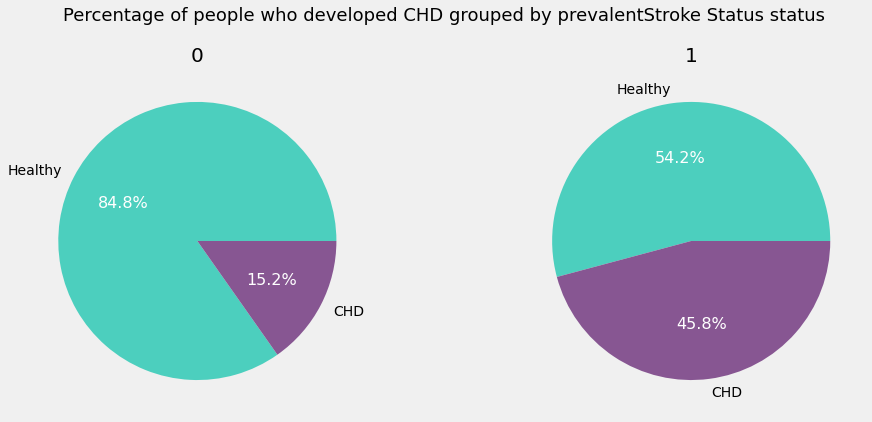

In [575]:
pie_with_target(df, 'prevalentStroke', 'prevalentStroke Status')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">PrevalentHyp</h3>

**Whether or not the patient was hypertensive**

In [576]:
explore_categorical_variable('prevalentHyp')

Statistics Values
0               Data Type  int64
1                   Count   3850
2                    Mode      0
3  Num of Possible values      2

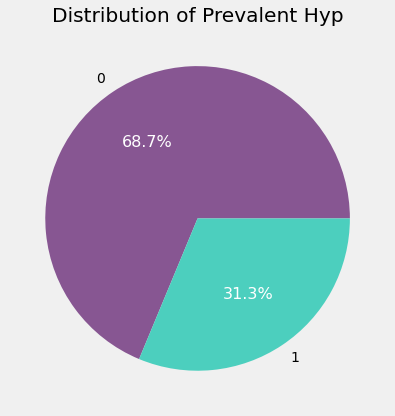

In [577]:
pie_plot(df, 'prevalentHyp', 'Prevalent Hyp', colors=['#875692','#4ccfbe'])

In [578]:
explore_categories('prevalentHyp',[0,1])

prevalentHyp  Count  Percentage
0             0   2646       68.73
1             1   1204       31.27

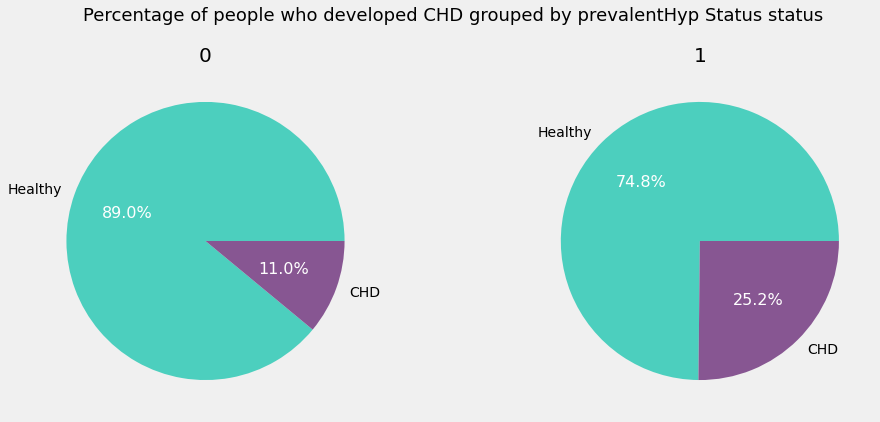

In [579]:
pie_with_target(df, 'prevalentHyp', 'prevalentHyp Status')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Diabetes</h3>

**Whether or not the patient had diabetes**

In [580]:
explore_categorical_variable('diabetes')

Statistics Values
0               Data Type  int64
1                   Count   3850
2                    Mode      0
3  Num of Possible values      2

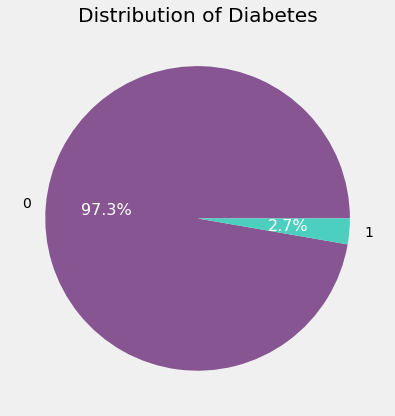

In [581]:
pie_plot(df, 'diabetes', 'Diabetes', colors=['#875692','#4ccfbe'])

In [582]:
explore_categories('diabetes',[0,1])

diabetes  Count  Percentage
0         0   3745       97.27
1         1    105        2.73

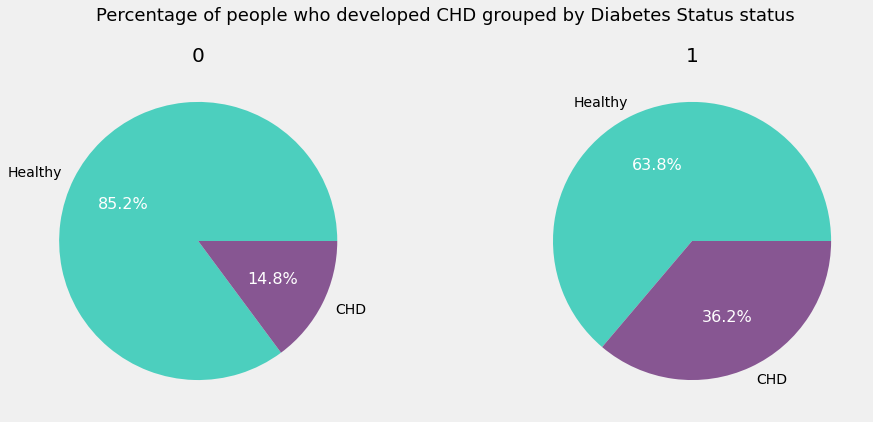

In [583]:
pie_with_target(df, 'diabetes', 'Diabetes Status')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">TotChol</h3>

**Total cholesterol level**

In [584]:
explore_continuous_variable('totChol')

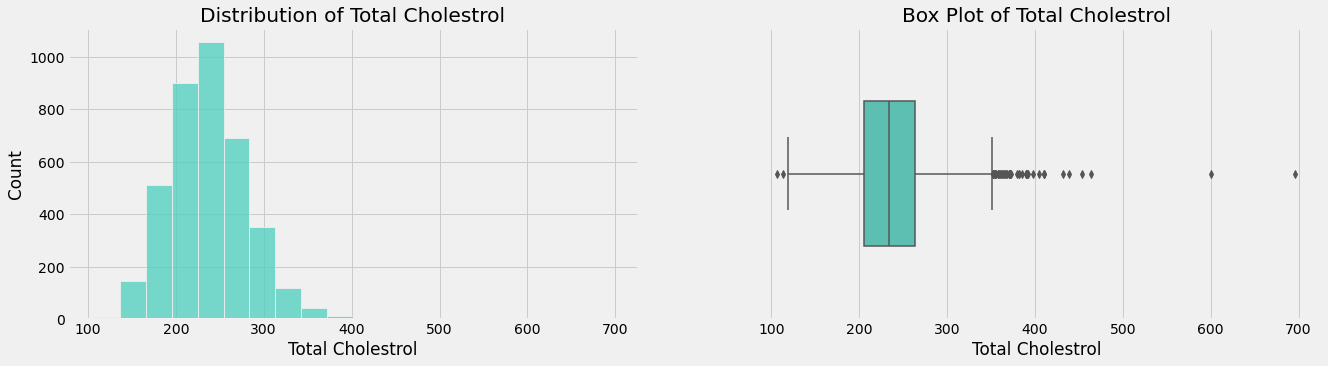

In [585]:
plot_distribution(df, 'totChol', 'Total Cholestrol')

In [586]:
compare_feature_statistics('totChol')

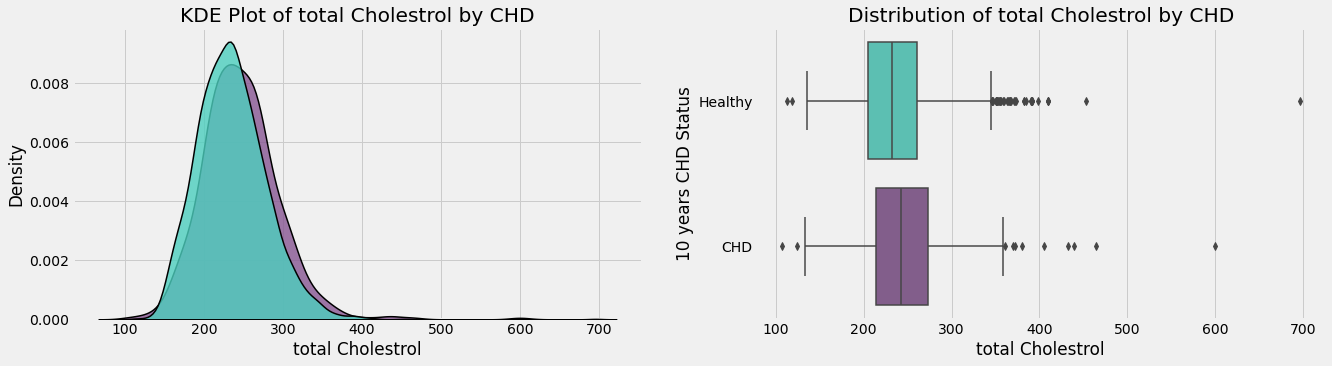

In [587]:
plot_CHD_vs_Healthy("totChol", "total Cholestrol")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">SysBP</h3>

**Systolic blood pressure**

In [588]:
explore_continuous_variable('sysBP')

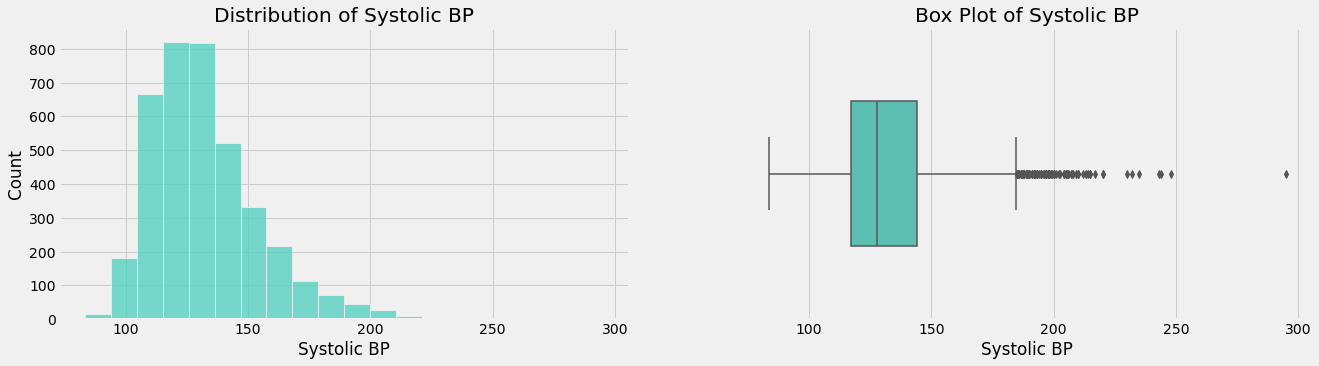

In [589]:
plot_distribution(df, 'sysBP', 'Systolic BP')

In [590]:
compare_feature_statistics('sysBP')

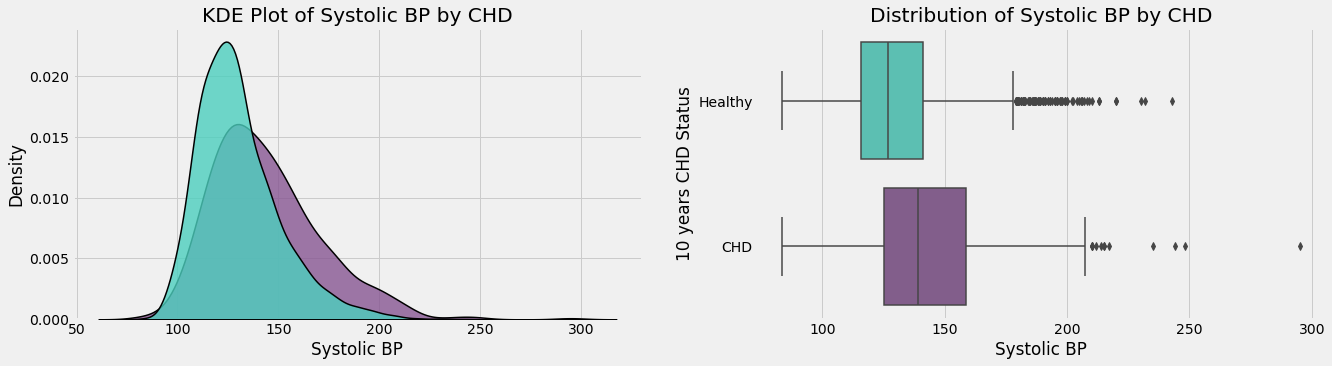

In [591]:
plot_CHD_vs_Healthy("sysBP", "Systolic BP")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">DiaBP</h3>

**Diastolic blood pressure**

In [592]:
explore_continuous_variable('diaBP')

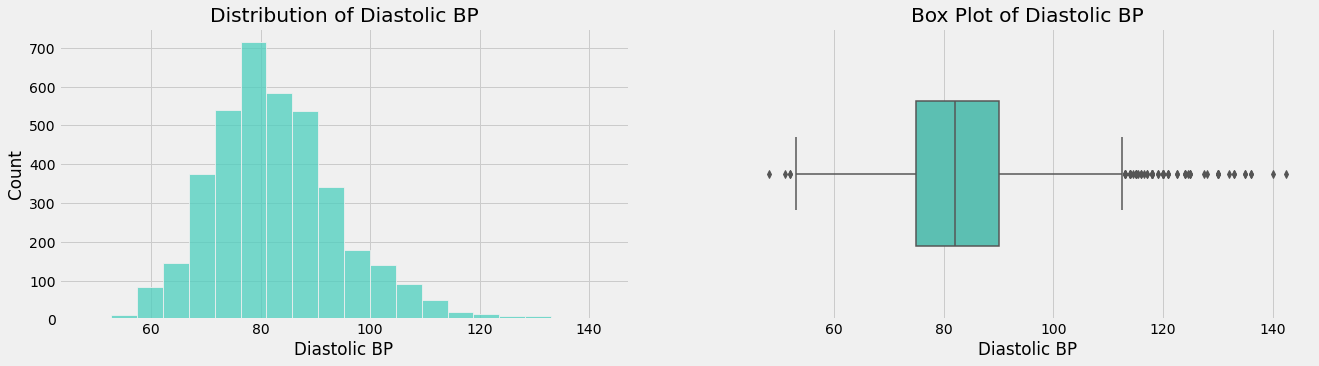

In [593]:
plot_distribution(df, 'diaBP', 'Diastolic BP')

In [594]:
compare_feature_statistics('diaBP')

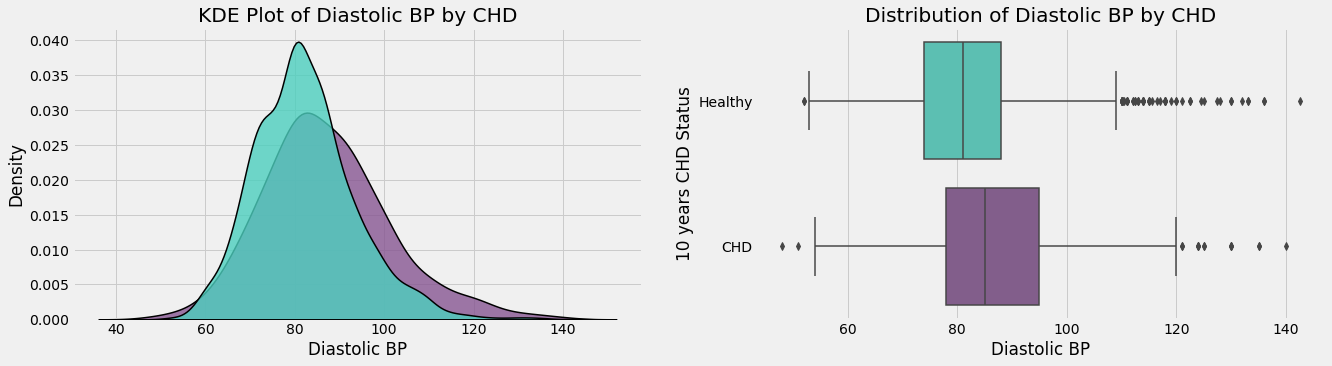

In [595]:
plot_CHD_vs_Healthy("diaBP", "Diastolic BP")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">BMI</h3>

 **Body Mass Index**

In [596]:
explore_continuous_variable('BMI')

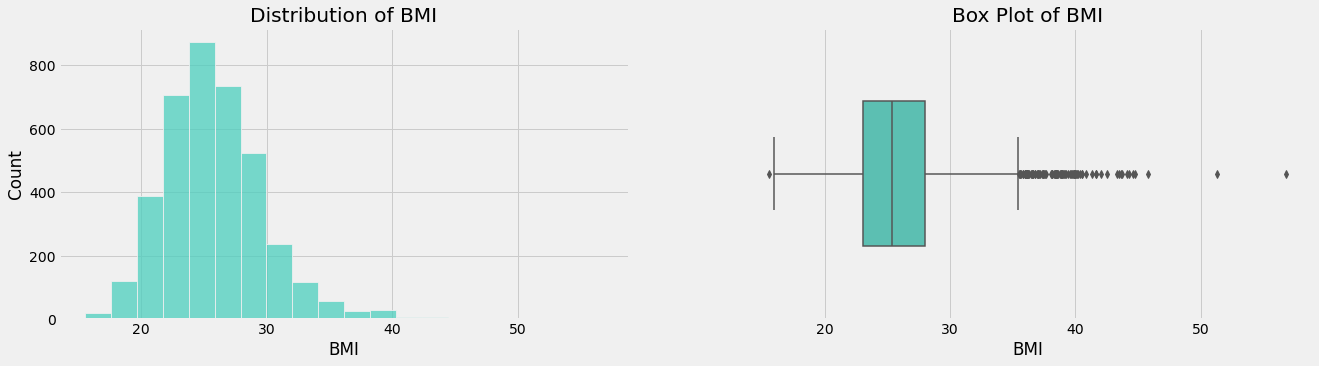

In [597]:
plot_distribution(df, 'BMI', 'BMI')

In [598]:
compare_feature_statistics('BMI')

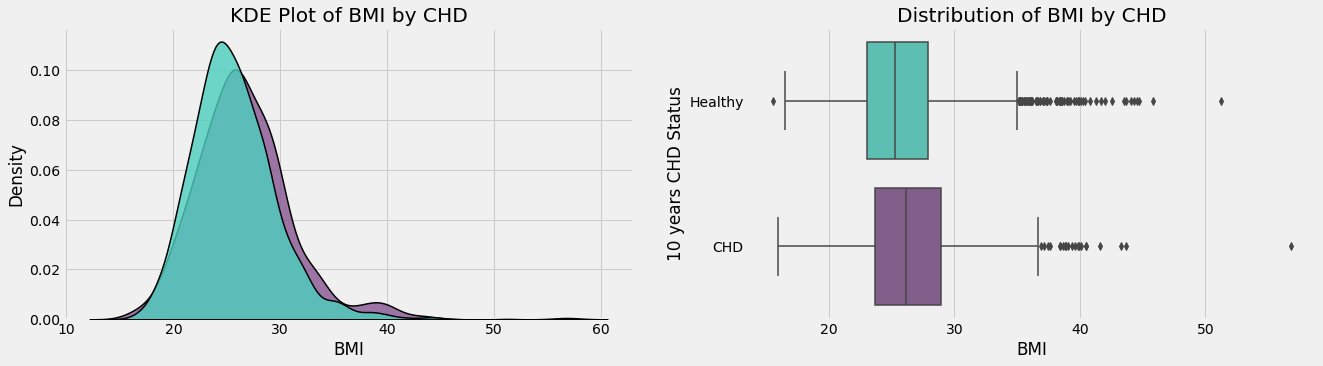

In [599]:
plot_CHD_vs_Healthy("BMI", "BMI")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">HeartRate</h3>

**Patient's Heart Rate**

In [600]:
explore_continuous_variable('heartRate')

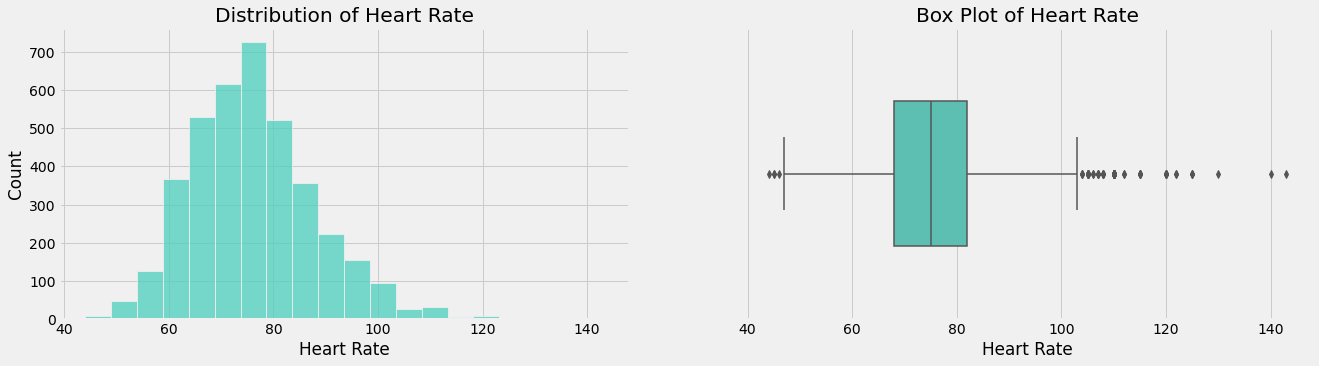

In [601]:
plot_distribution(df, 'heartRate', 'Heart Rate')

In [602]:
compare_feature_statistics('heartRate')

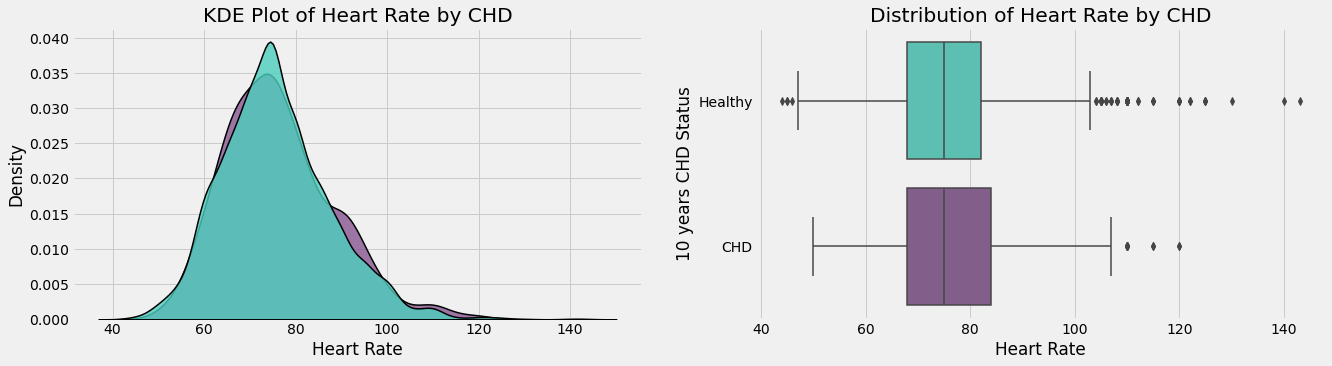

In [603]:
plot_CHD_vs_Healthy("heartRate", "Heart Rate")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Glucose</h3>

**Glucose level**

In [604]:
explore_continuous_variable('glucose')

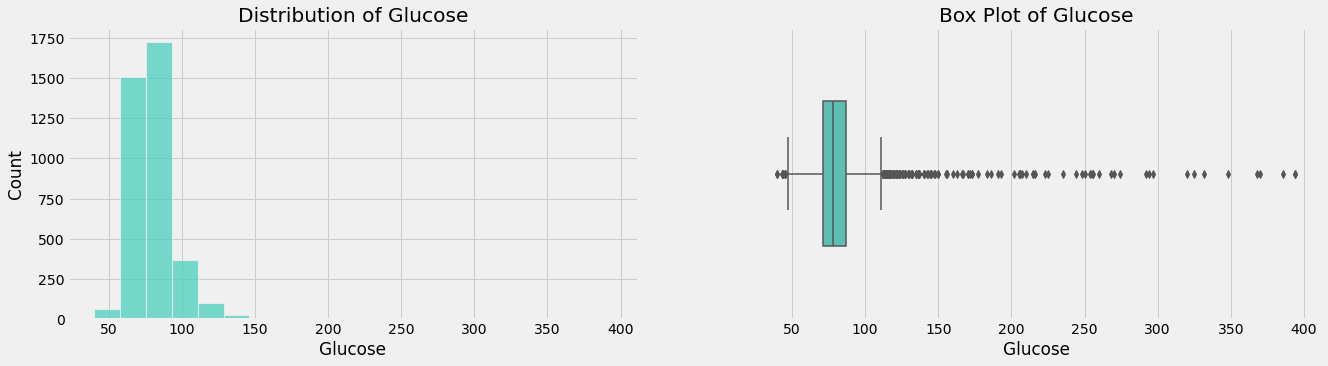

In [605]:
plot_distribution(df, 'glucose', 'Glucose')

In [606]:
compare_feature_statistics('glucose')

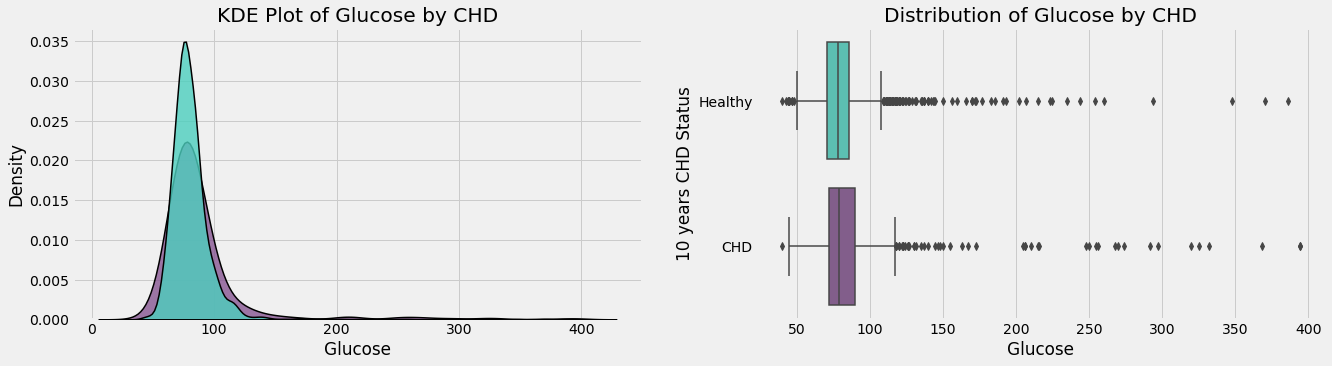

In [607]:
plot_CHD_vs_Healthy("glucose", "Glucose")

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Target</h3>

 **whether the patient has a 10-year risk of coronary heart disease (CHD)**

In [608]:
explore_categorical_variable('tenYearCHD')

Statistics Values
0               Data Type  int64
1                   Count   3850
2                    Mode      0
3  Num of Possible values      2

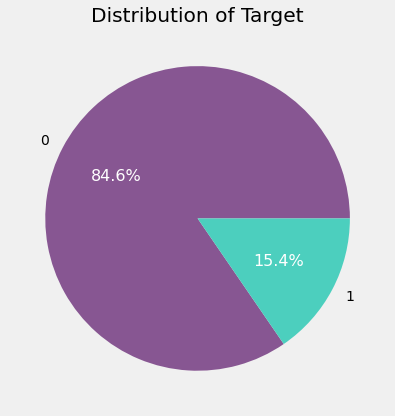

In [609]:
pie_plot(df, 'tenYearCHD', 'Target', colors=['#875692','#4ccfbe'])

In [610]:
explore_categories('tenYearCHD',[0,1])

tenYearCHD  Count  Percentage
0           0   3256       84.57
1           1    594       15.43

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Multivariate Analysis</h3>

The primary goal of this multivariate analysis is to gain deeper insights into the complex interplay of factors contributing to not only the risk of coronary heart disease, but also other risk factors and diseases. By examining the relationships between various features in the dataset, we aim to identify key risk factors and potential recommendations for cardiovascular health.

# <a id="2.1"></a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Defining Functions</h3>

In [611]:
df2 = df.copy()

In [612]:
df2['diabetes'] = df2['diabetes'].map({1: 'Patient', 0: 'Healthy'})
df2['prevalentHyp'] = df2['prevalentHyp'].map({1: 'Patient', 0: 'Healthy'})
df2['prevalentStroke'] = df2['prevalentStroke'].map({1: 'Patient', 0: 'Healthy'})
df2['currentSmoker'] = df2['currentSmoker'].map({1: 'Patient', 0: 'Healthy'})
df2['BPMeds'] = df2['BPMeds'].map({1: 'Patient', 0: 'Healthy'})

In [613]:
def plot_continuous_vs_categorical_features(feature, categorical_feature, plot_title, df=df2):
    box_plots_colors = {'Healthy': '#4ccfbe', 'Patient':'#875692'}
    
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

        # KDE plot for the continuous feature
        sns.kdeplot(data=df[df[categorical_feature]=='Patient'], x=feature, color='#875692', fill=True, linewidth=1.5, ec='black', alpha=0.8, zorder=3, ax=ax[0])
        sns.kdeplot(data=df[df[categorical_feature]=='Healthy'], x=feature, color='#4ccfbe', fill=True, linewidth=1.5, ec='black', alpha=0.8, zorder=3, ax=ax[0])

        ax[0].set_title(f"KDE Plot of {plot_title}")
        ax[0].set_xlabel(feature)
        ax[0].set_ylabel('Density')

        # Box plot for the continuous feature
        sns.boxplot(x=feature,
                    data=df,
                    y=categorical_feature,
                    linewidth=1.5,
                    palette=box_plots_colors,
                    ax=ax[1]).set_title(f"Distribution of {plot_title}")
        ax[1].set_xlabel(feature)
        ax[1].set_ylabel(categorical_feature)

        plt.show()

In [614]:
label_mapping = {0: 'Healthy', 1: 'CHD'}
def dual_scatter_plot(df, x_feature, y_feature, hue_feature='tenYearCHD', palette={0: '#4ccfbe', 1: '#875692'}, title1='Scatter Plot', title2='Scatter Plot with Target'):
    with plt.style.context('fivethirtyeight'):
        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Plot the scatter plot on the first subplot
        scatterplot1 = sns.scatterplot(x=x_feature, y=y_feature, data=df, color='#512b58', ax=axes[0])
        axes[0].set_title(title1)

        # Plot the scatter plot on the second subplot
        scatterplot2 = sns.scatterplot(x=x_feature, y=y_feature, data=df, hue=hue_feature, palette=palette, ax=axes[1])

        handles, labels = scatterplot2.get_legend_handles_labels()
        labels = [label_mapping[int(label)] for label in labels]
        scatterplot2.legend(handles, labels)
        axes[1].set_title(title2)

        # Adjust layout
        plt.tight_layout()
        plt.show()

In [615]:
def compare_categorical_percentage(df, group_feature, grouped_by, title1, title2, overall_title):
    # Calculate percentage of people who developed CHD for each group
    grouped = df.groupby(group_feature)[grouped_by].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    # Define custom color palette
    custom_palette = {0: '#4ccfbe', 1: '#875692'}
    # Define custom x-axis labels
    x_labels = {0: f'Non-{group_feature.capitalize()}', 1: group_feature.capitalize()}
    # Define custom legend labels
    legend_labels = {0: f'Not {grouped_by}', 1: grouped_by}

    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))

        for i, group_status in enumerate(grouped[group_feature].unique()):
            data = grouped[grouped[group_feature] == group_status]
            wedges, texts, autotexts = ax[i].pie(data['percentage'], labels=[legend_labels[status] for status in data[grouped_by]],
                                                 colors=[custom_palette[status] for status in data[grouped_by]],
                                                 autopct='%1.1f%%')
            ax[i].set_title(title2 if i == 1 else title1)  # Use custom titles for each pie chart
            plt.setp(autotexts, size=16, color="w")
        fig.legend(wedges, legend_labels.values(),loc="center right")
        
        fig.suptitle(f'Percentage of people who are {grouped_by} based on {overall_title} statues')

In [616]:
def compare_feature_statistics2(feature, group_by, data=df):
    # Extract the column for CHD and Healthy individuals
    Group_by_column_1 = data[data[group_by] == 1][feature]
    Group_by_column_0 = data[data[group_by] == 0][feature]

    # Basic statistics for the presence og group by feature
    feature_mean = int(Group_by_column_1.mean())
    feature_median = int(Group_by_column_1.median())
    feature_min = int(Group_by_column_1.min())
    feature_max = int(Group_by_column_1.max())
    feature_std_deviation = round(Group_by_column_1.std(), 2)
    feature_iqr = int(Group_by_column_1.quantile(0.75) - Group_by_column_1.quantile(0.25))

    # Basic statistics for the absence of group by feature
    no_feature_mean = int(Group_by_column_0.mean())
    no_feature_median = int(Group_by_column_0.median())
    no_feature_min = int(Group_by_column_0.min())
    no_feature_max = int(Group_by_column_0.max())
    no_feature_std_deviation = round(Group_by_column_0.std(), 2)
    no_feature_iqr = int(Group_by_column_0.quantile(0.75) - Group_by_column_0.quantile(0.25))

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        f'{feature} Statistics': ['Mean', 'Median', 'Min', 'Max', 'Std Deviation', 'IQR'],
        f'{group_by}': [feature_mean, feature_median, feature_min, feature_max, feature_std_deviation, feature_iqr],
        f'Not {group_by}': [no_feature_mean, no_feature_median, no_feature_min, no_feature_max, no_feature_std_deviation, no_feature_iqr]
    })

    results_df = results_df.set_index(f'{feature} Statistics')
    
    results_df = results_df.astype(int)

    # Create a Styler object
    styled_df = results_df.style.set_properties(**{'text-align': 'center'})

    return styled_df

# <a id="2.1"></a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Age & Risk Factors Development</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Age & Diabetes</h3>

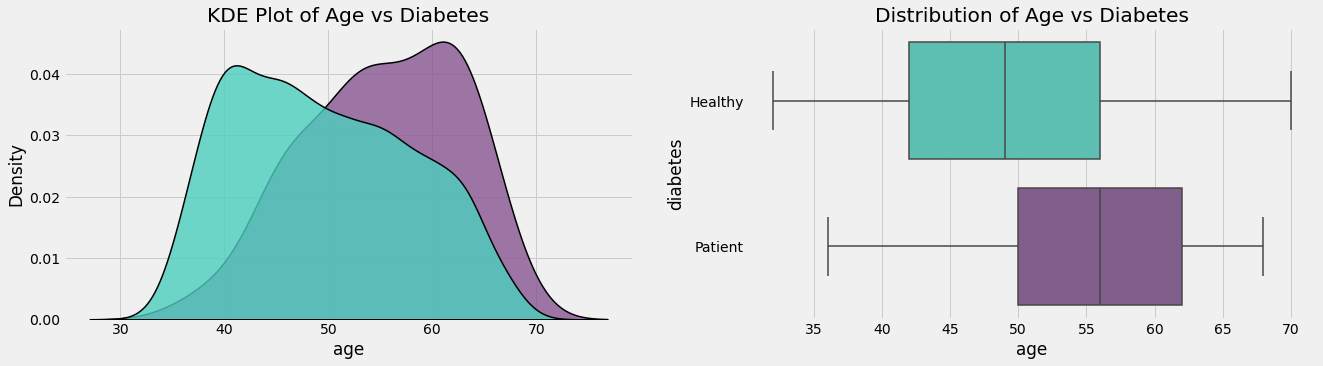

In [617]:
plot_continuous_vs_categorical_features('age', 'diabetes', 'Age vs Diabetes')

In [618]:
compare_feature_statistics2('age', 'diabetes')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Age & Hypertension</h3>

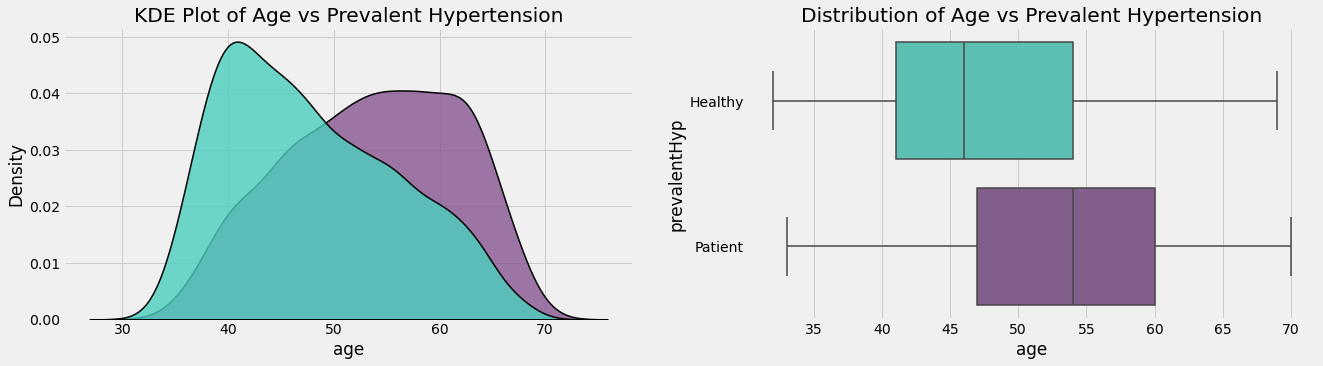

In [619]:
plot_continuous_vs_categorical_features('age', 'prevalentHyp',  'Age vs Prevalent Hypertension')

In [620]:
compare_feature_statistics2('age', 'prevalentHyp')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Age & Stroke</h3>

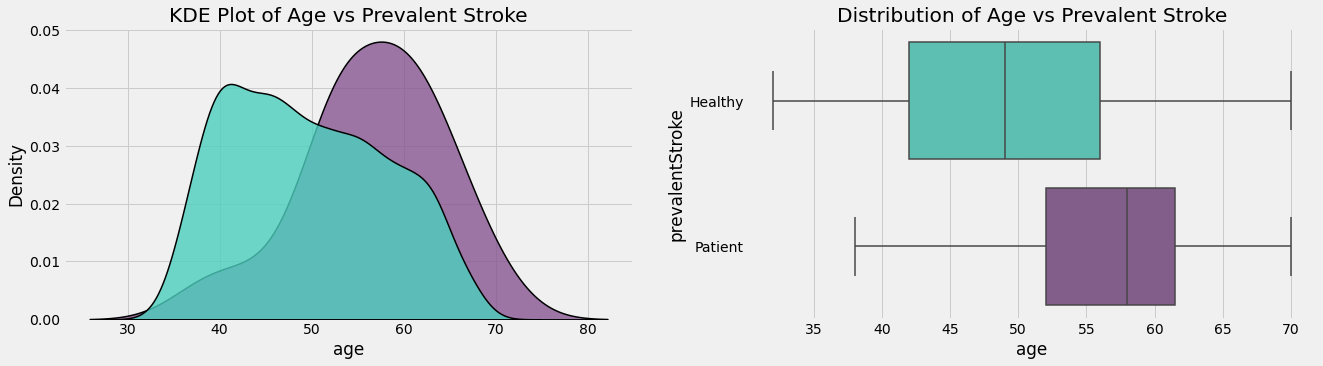

In [664]:
plot_continuous_vs_categorical_features('age', 'prevalentStroke', 'Age vs Prevalent Stroke')

In [622]:
compare_feature_statistics2('age', 'prevalentStroke')

# <a id="2.1"></a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Blood Pressure, Cholesterol, Hypertension & Medications</h3

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Systolic Pressure & Hypertension</h3>

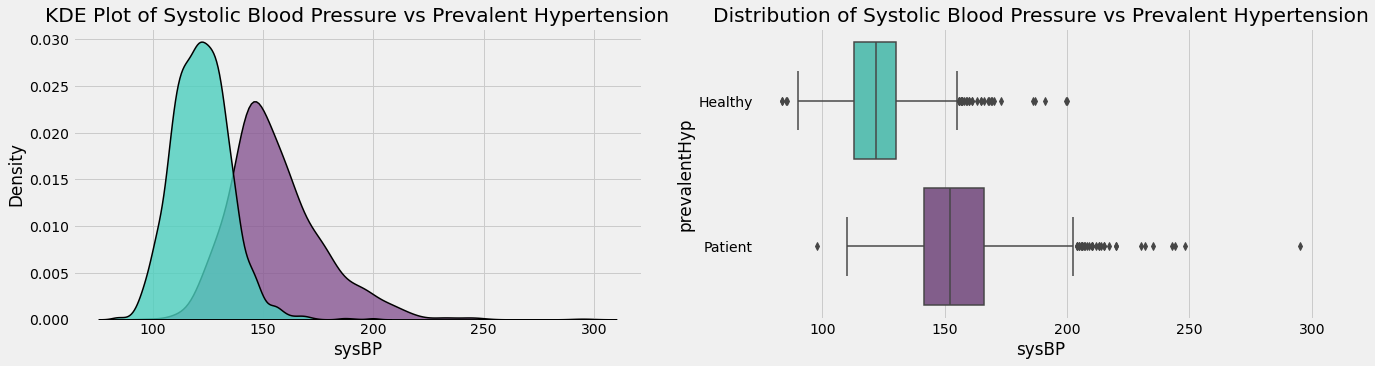

In [623]:
plot_continuous_vs_categorical_features('sysBP', 'prevalentHyp',  'Systolic Blood Pressure vs Prevalent Hypertension')

In [624]:
compare_feature_statistics2('sysBP', 'prevalentHyp')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Diastolic Pressure & Hypertension</h3>

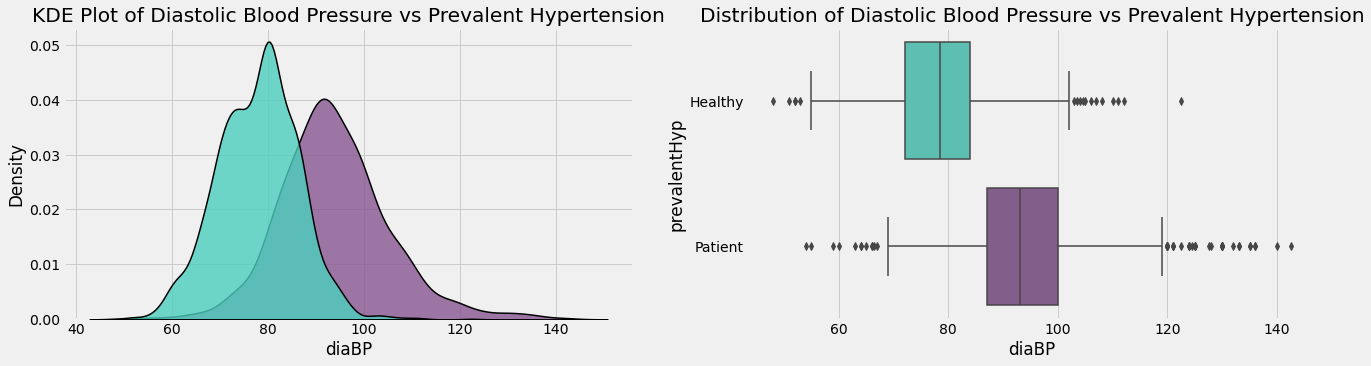

In [625]:
plot_continuous_vs_categorical_features('diaBP', 'prevalentHyp',  'Diastolic Blood Pressure vs Prevalent Hypertension')

In [626]:
compare_feature_statistics2('diaBP', 'prevalentHyp')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Total Cholesterol & Hypertension</h3>

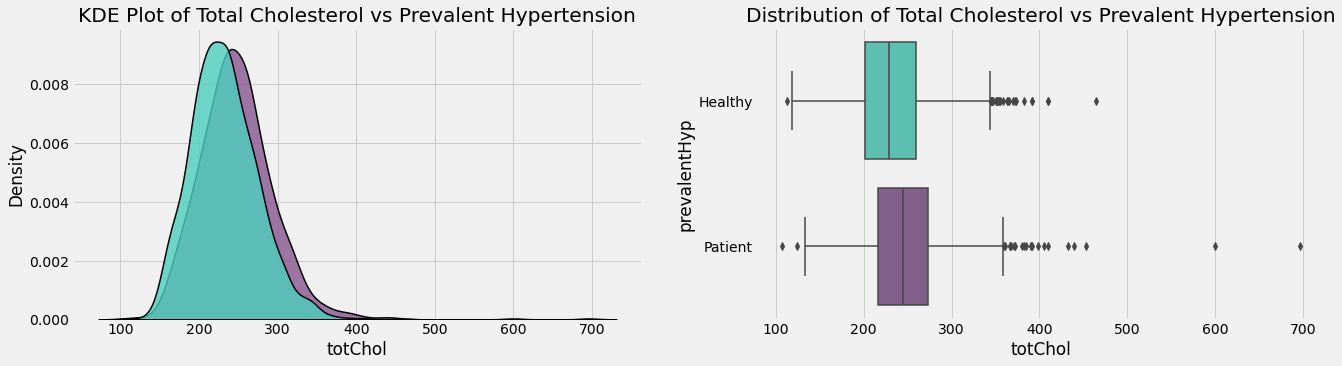

In [627]:
plot_continuous_vs_categorical_features('totChol', 'prevalentHyp',  'Total Cholesterol vs Prevalent Hypertension')

In [628]:
compare_feature_statistics2('totChol', 'prevalentHyp')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Systolic Pressure & Blood Pressure Medications</h3>

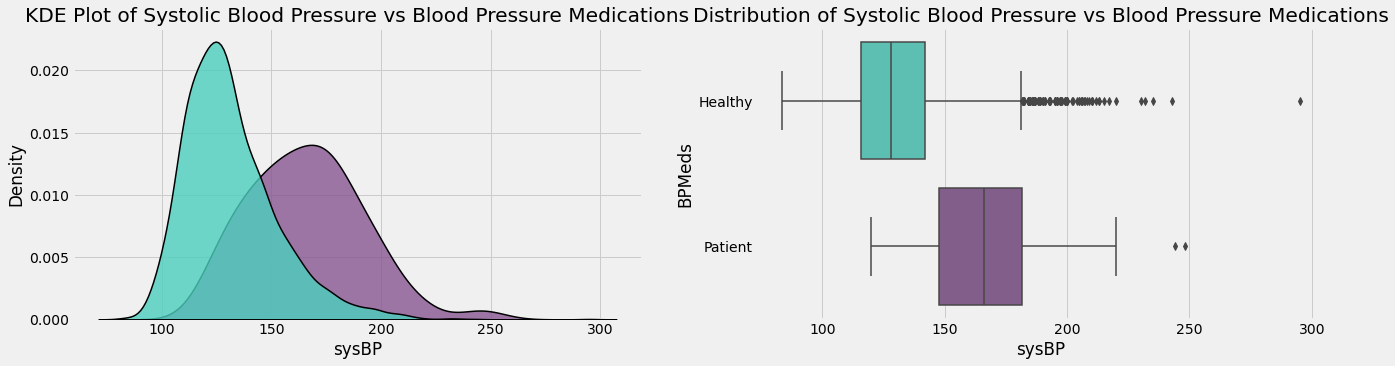

In [629]:
plot_continuous_vs_categorical_features('sysBP', 'BPMeds',  'Systolic Blood Pressure vs Blood Pressure Medications')

In [630]:
compare_feature_statistics2('sysBP', 'BPMeds')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Diastolic Pressure & Blood Pressure Medications</h3>

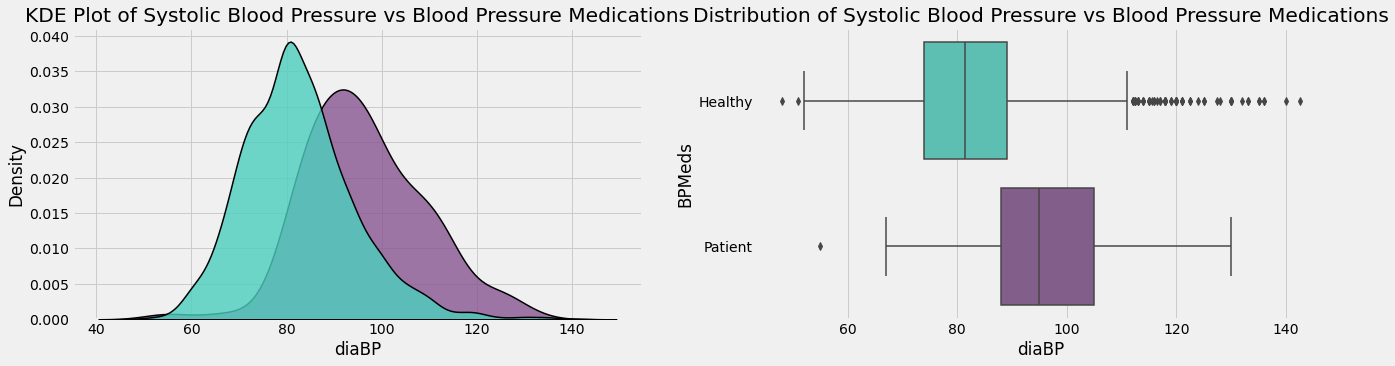

In [631]:
plot_continuous_vs_categorical_features('diaBP', 'BPMeds', 'Systolic Blood Pressure vs Blood Pressure Medications')

In [632]:
compare_feature_statistics2('diaBP', 'BPMeds')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Total Cholesterol & Blood Pressure Medications</h3>

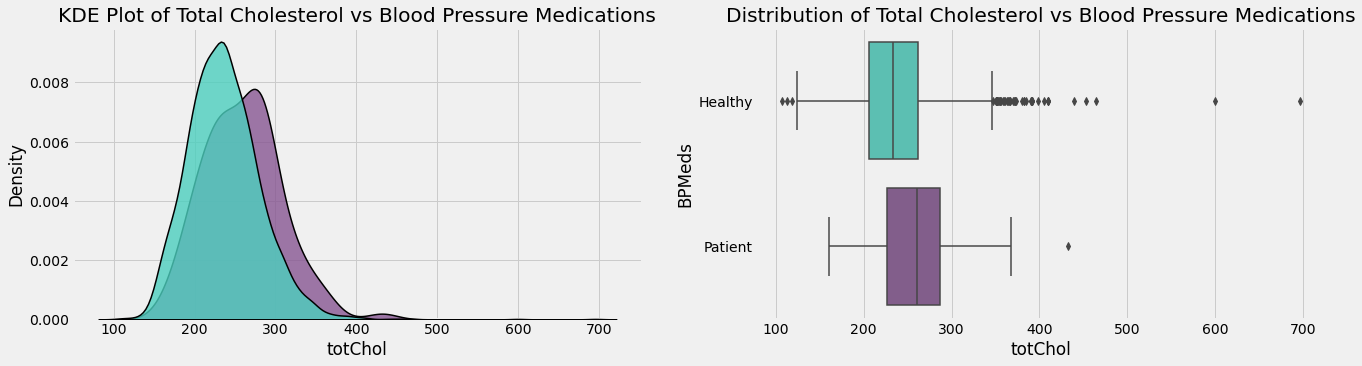

In [633]:
plot_continuous_vs_categorical_features('totChol', 'BPMeds',  'Total Cholesterol vs Blood Pressure Medications')

In [634]:
compare_feature_statistics2('totChol', 'BPMeds')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Diastolic Pressure & Systolic Pressure</h3>

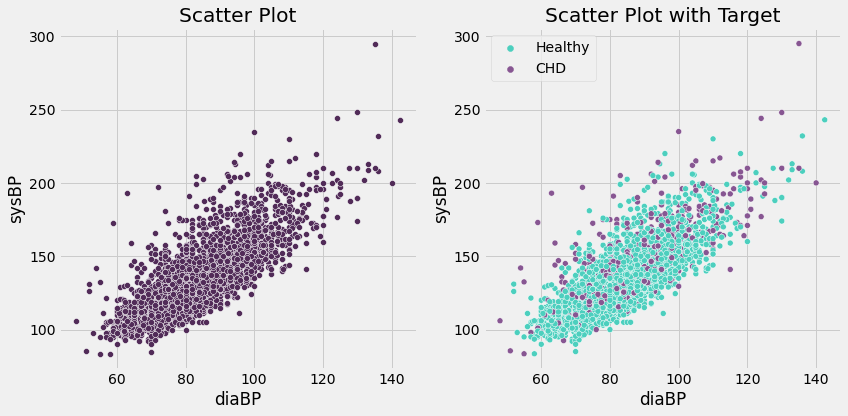

In [635]:
dual_scatter_plot(df, 'diaBP', 'sysBP')

# <a id="2.1"></a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Glucose levels & Diabetes</h3>

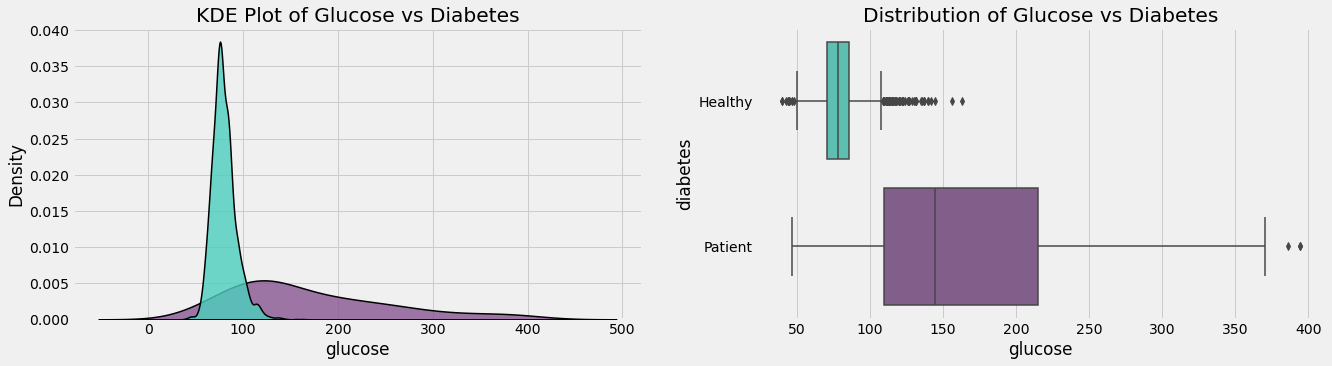

In [636]:
plot_continuous_vs_categorical_features('glucose', 'diabetes', 'Glucose vs Diabetes')

In [637]:
compare_feature_statistics2('glucose', 'diabetes')

# <a id="2.1"></a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">BMI & Risk Factors Development</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">BMI & Diabetes</h3>

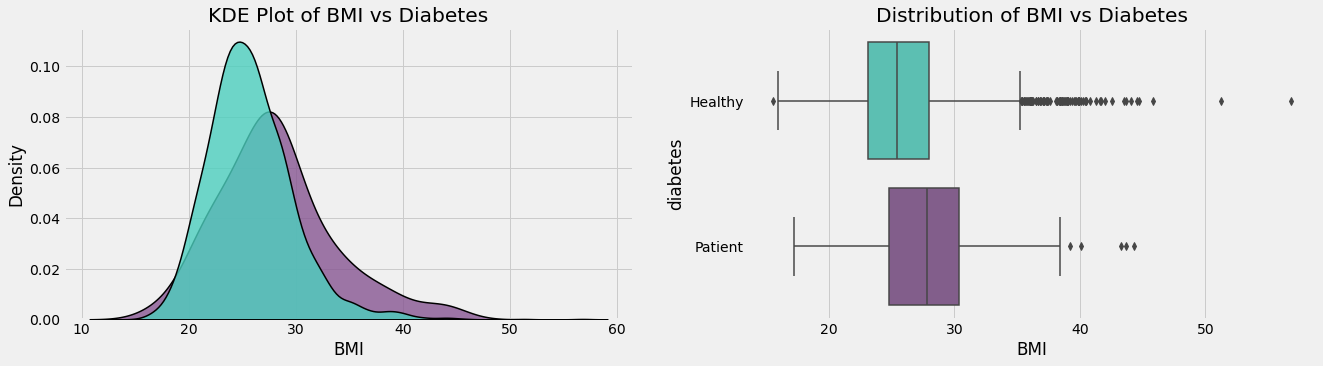

In [638]:
plot_continuous_vs_categorical_features('BMI', 'diabetes', 'BMI vs Diabetes')

In [639]:
compare_feature_statistics2('BMI', 'diabetes')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">BMI & Hypertension</h3>

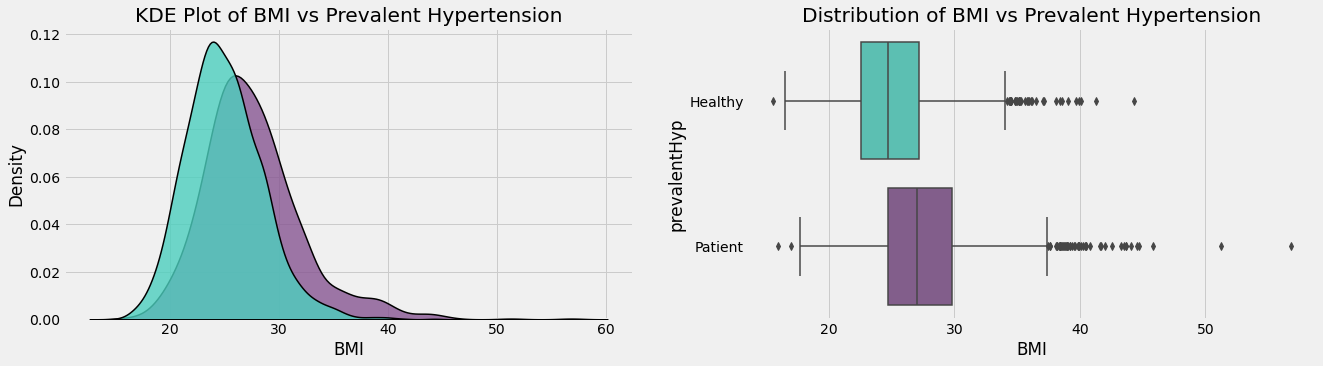

In [640]:
plot_continuous_vs_categorical_features('BMI', 'prevalentHyp',  'BMI vs Prevalent Hypertension')

In [641]:
compare_feature_statistics2('BMI', 'prevalentHyp')

# </a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Smoking & Risk Factors Development</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Smoking & Diabetes</h3>

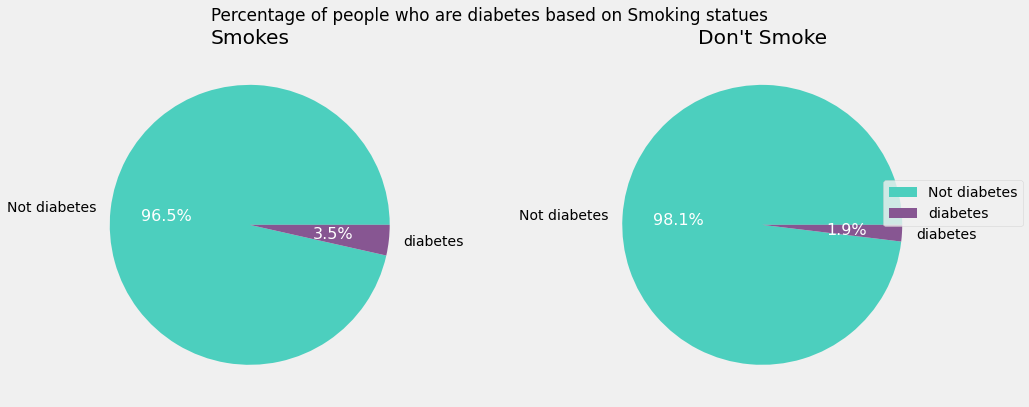

In [642]:
compare_categorical_percentage(df, 'currentSmoker', 'diabetes', 'Smokes', "Don't Smoke", 'Smoking')

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Smoking & Hypertension</h3>

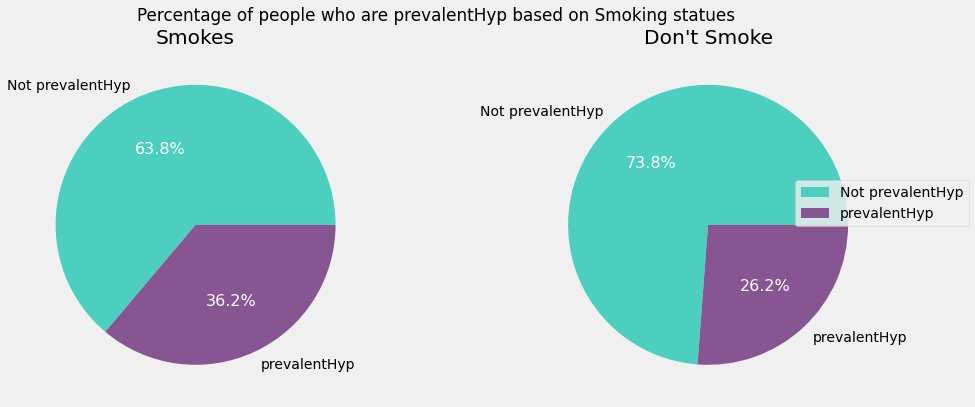

In [643]:
compare_categorical_percentage(df, 'currentSmoker', 'prevalentHyp', 'Smokes', "Don't Smoke", 'Smoking')

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Statistical & Hypothesis Tests</h3>

# </a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Anova Test</h3>

The ANOVA test is used to analyze whether there are significant differences in means between groups. In our case, we are comparing the means of the continuous features such as : age, BMI, blood pressure ...etc across different groups defined by the categorical features such as : CHD. Diabetes, hypertension ...etc

The results of anova test involve :
- F-Statistic: It measures the ratio of the between-group variability to the within-group variability. Higher values of the F-statistic indicate larger differences between the group means.
- p-value: It represents the probability of observing the F-statistic or a more extreme value if the null hypothesis (no difference between group means) is true. A small p-value (typically less than 0.05) suggests strong evidence against the null hypothesis.

In [644]:
column = list(df.columns)
categorical_features = []
continuous_features = []
for i in column:
    if len(df[i].unique()) > 6:
        continuous_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('continuous Features :',*continuous_features)

Categorical Features : education currentSmoker BPMeds prevalentStroke prevalentHyp diabetes gender tenYearCHD TenYearCHD_statue
continuous Features : age cigsPerDay totChol sysBP diaBP BMI heartRate glucose


In [645]:
def perform_anova_test(df, categorical_feature):

    # Perform ANOVA for each continuous feature
    anova_results = []
    for continuous_feature in continuous_features:
        groups = []
        for group_name, group_data in df.groupby(categorical_feature):
            groups.append(group_data[continuous_feature].values)
        
        anova_result = stats.f_oneway(*groups)
        anova_results.append((continuous_feature, round(anova_result.statistic,2), anova_result.pvalue))
    
    # Create a DataFrame from the ANOVA results
    anova_results_df = pd.DataFrame(anova_results, columns=['Continuous Feature', 'F-Statistic', 'p-value'])
    
    # Set the Continuous Feature column as the index
    anova_results_df.set_index('Continuous Feature', inplace=True)
    
    # Sort the DataFrame by p-value in ascending order
    anova_results_df = anova_results_df.sort_values('p-value')
    
    return anova_results_df

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">CHD</h3>

In [646]:
perform_anova_test(df, 'tenYearCHD')

F-Statistic       p-value
Continuous Feature                           
age                      225.35  1.514600e-49
sysBP                    200.05  2.584417e-44
diaBP                     84.32  6.691729e-20
glucose                   61.62  5.357519e-15
totChol                   32.52  1.267375e-08
BMI                       27.29  1.845857e-07
cigsPerDay                11.49  7.065533e-04
heartRate                  1.68  1.950502e-01

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Hypertension</h3>

In [647]:
perform_anova_test(df, 'prevalentHyp')

F-Statistic       p-value
Continuous Feature                           
sysBP                   3695.09  0.000000e+00
diaBP                   2359.19  0.000000e+00
age                      408.72  1.853037e-86
BMI                      384.01  1.399159e-81
totChol                  107.77  6.429750e-25
heartRate                 78.73  1.071332e-18
glucose                   29.23  6.800887e-08
cigsPerDay                18.20  2.032478e-05

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Diabetes</h3>

In [648]:
perform_anova_test(df, 'diabetes')

F-Statistic       p-value
Continuous Feature                           
glucose                 2373.14  0.000000e+00
sysBP                     49.26  2.632272e-12
age                       46.73  9.424730e-12
BMI                       35.47  2.818358e-09
heartRate                 13.67  2.206471e-04
diaBP                     10.58  1.153162e-03
totChol                    7.14  7.561014e-03
cigsPerDay                 6.43  1.126616e-02

# </a>
<h3 style="background-color:#e7fbf8;font-family:newtimeroman;font-size:210%;text-align:center;border-radius: 15px 50px;">Chi squared Test</h3>

The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. It helps us understand whether the observed frequencies of categories in the variables differ significantly from what we would expect by chance.

The chi-square test allows us to examine relationships between categorical variables and identify any patterns or dependencies. It helps answer questions such as:

- Are two categorical variables related or independent?
- Are there any significant associations between categories in the variables?

Higher chi-square values indicate a greater deviation from the expected frequencies, suggesting a stronger association between the categorical feature and the target feature.

In [649]:
def perform_chi_square_test(target_feature, categorical_features=categorical_features, df=df):
    categorical_features = [feature for feature in categorical_features if feature != target_feature]

    chi_square_results = []
    for feature in categorical_features:
        contingency_table = pd.crosstab(df[feature], df[target_feature])
        chi2, _, _, expected = chi2_contingency(contingency_table, correction=False)
        chi_square_results.append((feature, round(chi2, 2), expected))

    chi_square_results_df = pd.DataFrame(chi_square_results, columns=['Categorical Feature', 'Chi-Square', 'Expected Frequencies'])
    chi_square_results_df.set_index('Categorical Feature', inplace=True)
    chi_square_results_df = chi_square_results_df.sort_values('Chi-Square', ascending=False)

    return chi_square_results_df

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">CHD</h3>

In [650]:
perform_chi_square_test('tenYearCHD')

Chi-Square  \
Categorical Feature               
TenYearCHD_statue       3850.00   
prevalentHyp             127.31   
diabetes                  35.66   
education                 32.32   
gender                    31.11   
BPMeds                    26.10   
prevalentStroke           17.11   
currentSmoker              1.26   

                                                  Expected Frequencies  
Categorical Feature                                                     
TenYearCHD_statue    [[502.3542857142857, 91.64571428571429], [2753...  
prevalentHyp                    [[2237.76, 408.24], [1018.24, 185.76]]  
diabetes                               [[3167.2, 577.8], [88.8, 16.2]]  
education            [[525.1885714285714, 95.81142857142858], [1411...  
gender               [[1814.902857142857, 331.09714285714284], [144...  
BPMeds               [[3159.5885714285714, 576.4114285714286], [96....  
prevalentStroke      [[3235.7028571428573, 590.2971428571428], [20....  
currentSmoker        [[1658.4457142857143, 302.5542857142857], [159...

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Hypertension</h3>

In [651]:
perform_chi_square_test('prevalentHyp')

Chi-Square  \
Categorical Feature               
BPMeds                   258.18   
tenYearCHD               127.31   
TenYearCHD_statue        127.31   
currentSmoker             44.33   
education                 32.28   
diabetes                  26.60   
prevalentStroke           21.49   
gender                     0.00   

                                                  Expected Frequencies  
Categorical Feature                                                     
BPMeds               [[2567.650909090909, 1168.3490909090908], [78....  
tenYearCHD                      [[2237.76, 1018.24], [408.24, 185.76]]  
TenYearCHD_statue               [[408.24, 185.76], [2237.76, 1018.24]]  
currentSmoker        [[1347.7418181818182, 613.2581818181818], [129...  
education            [[426.79636363636365, 194.20363636363638], [11...  
diabetes             [[2573.836363636364, 1171.1636363636364], [72....  
prevalentStroke      [[2629.5054545454545, 1196.4945454545455], [16...  
gender               [[1474.8872727272728, 671.1127272727273], [117...

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Diabetes</h3>

In [652]:
perform_chi_square_test('diabetes')

Chi-Square  \
Categorical Feature               
tenYearCHD                35.66   
TenYearCHD_statue         35.66   
prevalentHyp              26.60   
BPMeds                    11.82   
education                 10.86   
currentSmoker              9.43   
gender                     0.81   
prevalentStroke            0.19   

                                                  Expected Frequencies  
Categorical Feature                                                     
tenYearCHD                             [[3167.2, 88.8], [577.8, 16.2]]  
TenYearCHD_statue                      [[577.8, 16.2], [3167.2, 88.8]]  
prevalentHyp         [[2573.836363636364, 72.16363636363636], [1171...  
BPMeds               [[3634.109090909091, 101.89090909090909], [110...  
education            [[604.0636363636364, 16.936363636363637], [162...  
currentSmoker        [[1907.5181818181818, 53.481818181818184], [18...  
gender               [[2087.4727272727273, 58.527272727272724], [16...  
prevalentStroke      [[3721.6545454545453, 104.34545454545454], [23...

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Outliers handling discussion</h3>

During our examination of the dataset, we observed the presence of outliers in various features, as indicated by statistical measures such as box plots and histograms we have built before. These outliers were defined as values that **exceeded the range of Q3 + 1.5 IQR (interquartile range) or were below Q1 - 1.5 IQR**. However, we subsequently engaged in discussions with domain experts in the medical field to gain a deeper understanding of these outliers.

The insights provided by **medical domain experts** played a crucial role in our decision-making process. We learned that the outliers we initially identified actually represent valid and plausible data points that **can exist in the real world. These values are not errors or noise but rather reflect extreme occurrences** that can contribute to a comprehensive understanding of the factors associated with CHD.

Based on these discussions and the validation of the outliers, we have made the **informed decision to retain them in our analysis**.

By doing so, we aim to **capture the full range of real-world scenarios and avoid introducing bias into our findings**.

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Models Development</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Importing Libraries</h3>

In [653]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [654]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Data Scaling</h3>

In [655]:
df = df.drop(columns=['TenYearCHD_statue'])

In [656]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
categorical

['education', 'gender']

In [657]:
numerical = [col for col in df.columns if df[col].dtype != "O"]
numerical = numerical[0:-1]
numerical

['age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [658]:
X = df.drop('tenYearCHD', axis=1)
Y = df['tenYearCHD']

X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.15, random_state=42, stratify=Y)

pipeline = ColumnTransformer([("scaler", StandardScaler() ,numerical ),
                               ("encoder", OneHotEncoder() , categorical)
                             ])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test) 

In [659]:
joblib.dump(pipeline, "pipeline.joblib")

['pipeline.joblib']

In [660]:
pipeline

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 ['age', 'currentSmoker', 'cigsPerDay',
                                  'BPMeds', 'prevalentStroke', 'prevalentHyp',
                                  'diabetes', 'totChol', 'sysBP', 'diaBP',
                                  'BMI', 'heartRate', 'glucose']),
                                ('encoder', OneHotEncoder(),
                                 ['education', 'gender'])])

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Oversampling Data</h3>

# <a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Modeling</h3>

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Correlation</h3>

In [661]:
df['gender'] = df['gender'].map({'male' : 1 , 'female' : 0})
df['education'] = df['education'].map({'High School' : 1 , 'High School Diploma/GED' : 2 ,
                                       'College' : 3     , 'Higher Degree' : 4}) 

In [662]:
df.corr()

age  education  currentSmoker  cigsPerDay    BPMeds  \
age              1.000000  -0.163038      -0.212138   -0.190075  0.128109   
education       -0.163038   1.000000       0.025091    0.015158 -0.012841   
currentSmoker   -0.212138   0.025091       1.000000    0.764137 -0.051905   
cigsPerDay      -0.190075   0.015158       0.764137    1.000000 -0.044819   
BPMeds           0.128109  -0.012841      -0.051905   -0.044819  1.000000   
prevalentStroke  0.064329  -0.035097      -0.038126   -0.034428  0.102974   
prevalentHyp     0.309869  -0.079311      -0.107300   -0.068618  0.258959   
diabetes         0.109539  -0.042165      -0.049502   -0.040841  0.055420   
totChol          0.259715  -0.015362      -0.048529   -0.031314  0.087973   
sysBP            0.391781  -0.122452      -0.135438   -0.094654  0.264197   
diaBP            0.205713  -0.056330      -0.114138   -0.059065  0.196164   
BMI              0.135403  -0.140232      -0.161405   -0.092487  0.103887   
heartRate       -0.006324  -0.055704       0.057370    0.067386  0.009689   
glucose          0.122256  -0.035912      -0.056826   -0.059472  0.050963   
gender          -0.027330   0.017135       0.204958    0.325068 -0.050767   
tenYearCHD       0.235210  -0.061734       0.018058    0.054564  0.082343   

                 prevalentStroke  prevalentHyp  diabetes   totChol     sysBP  \
age                     0.064329      0.309869  0.109539  0.259715  0.391781   
education              -0.035097     -0.079311 -0.042165 -0.015362 -0.122452   
currentSmoker          -0.038126     -0.107300 -0.049502 -0.048529 -0.135438   
cigsPerDay             -0.034428     -0.068618 -0.040841 -0.031314 -0.094654   
BPMeds                  0.102974      0.258959  0.055420  0.087973  0.264197   
prevalentStroke         1.000000      0.074703  0.006999  0.003776  0.063182   
prevalentHyp            0.074703      1.000000  0.083118  0.165054  0.699903   
diabetes                0.006999      0.083118  1.000000  0.043042  0.112431   
totChol                 0.003776      0.165054  0.043042  1.000000  0.213030   
sysBP                   0.063182      0.699903  0.112431  0.213030  1.000000   
diaBP                   0.051484      0.616502  0.052363  0.167187  0.784481   
BMI                     0.028657      0.301230  0.095573  0.113015  0.327542   
heartRate              -0.022578      0.141595  0.059503  0.096073  0.180654   
glucose                 0.018431      0.086834  0.617627  0.046322  0.140621   
gender                 -0.004135      0.000127  0.014535 -0.071865 -0.046269   
tenYearCHD              0.066665      0.181841  0.096241  0.091546  0.222301   

                    diaBP       BMI  heartRate   glucose    gender  tenYearCHD  
age              0.205713  0.135403  -0.006324  0.122256 -0.027330    0.235210  
education       -0.056330 -0.140232  -0.055704 -0.035912  0.017135   -0.061734  
currentSmoker   -0.114138 -0.161405   0.057370 -0.056826  0.204958    0.018058  
cigsPerDay      -0.059065 -0.092487   0.067386 -0.059472  0.325068    0.054564  
BPMeds           0.196164  0.103887   0.009689  0.050963 -0.050767    0.082343  
prevalentStroke  0.051484  0.028657  -0.022578  0.018431 -0.004135    0.066665  
prevalentHyp     0.616502  0.301230   0.141595  0.086834  0.000127    0.181841  
diabetes         0.052363  0.095573   0.059503  0.617627  0.014535    0.096241  
totChol          0.167187  0.113015   0.096073  0.046322 -0.071865    0.091546  
sysBP            0.784481  0.327542   0.180654  0.140621 -0.046269    0.222301  
diaBP            1.000000  0.380983   0.178294  0.061231  0.052359    0.146438  
BMI              0.380983  1.000000   0.071512  0.086290  0.075590    0.083914  
heartRate        0.178294  0.071512   1.000000  0.094492 -0.115863    0.020888  
glucose          0.061231  0.086290   0.094492  1.000000  0.006083    0.125544  
gender           0.052359  0.075590  -0.115863  0.006083  1.000000    0.089897  
tenYearCHD       0.146438  0.083914   0.020888  0.12554

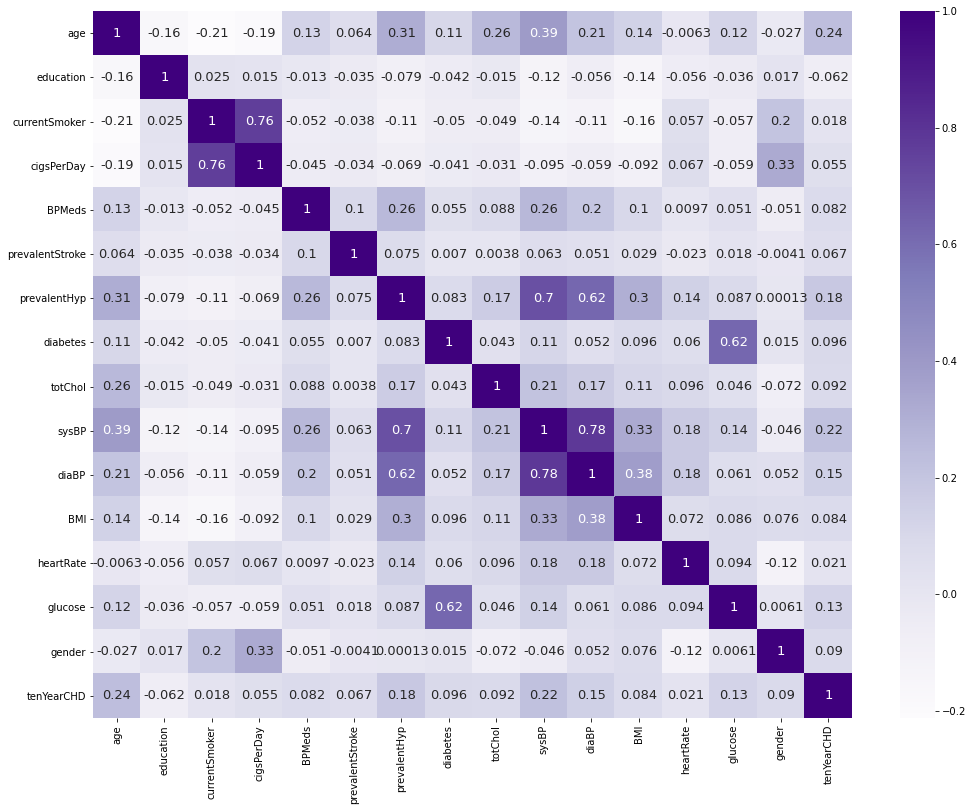

In [692]:
plt.figure(figsize=(17,13))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 13},cmap='Purples')
plt.show()

# <a id="2.1"></a>
<h3 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Deployment</h3>